# SONM active deal analyzer

## This notebook is to analyze active deals on the SONM platform in real-time.

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns

In [3]:
import datetime


In [4]:
pd.Timestamp.now()

Timestamp('2018-09-23 11:02:39.293106')

In [5]:
from matplotlib import pyplot as plt

### ipython magic to plot in a notebook

In [6]:
%matplotlib inline

### SONM's DWH spits out API information of active deals.  Using Jupyter's magic to run BASH command to save the API data to livedeal.txt

In [7]:
!curl -s https://dwh.livenet.sonm.com:15022/DWHServer/GetDeals/ -d '{"status":1}' > livedeal.txt

In [8]:
!curl -s https://dwh.livenet.sonm.com:15022/DWHServer/GetDeals/ -d '{"status":2}' > history.txt

In [9]:
!curl -s https://dwh.livenet.sonm.com:15022/DWHServer/GetDeals/ -d '{"status":0}' > all.txt

### Open the saved text in Jupyter

In [10]:
f = open('all.txt','r')

### Convert opened file to Pandas dataframe.

In [11]:
k = f.readlines()

In [12]:
r = k[0].split(',')

In [13]:
headposition = []
i = 0
for item in r:
    if 'deal' in item:

        headposition.append(i)
    i = i+1

In [14]:
#modified_list29 = []
#modified_list30 = []
#modified_list31 = []
test_list=[]
for i in range(len(headposition)):
    if headposition[i]>0:
        #print(int(headposition[i-1])-int(headposition[i]))
        # Selecting only spot deals
        #print(int(headposition[i-1])-int(headposition[i]))
        content = r[headposition[i-1] : headposition[i]]
        #print(content)
        for item in content:
            if 'duration' in item:
                #print("yes")
                #print(content)
                content.remove(item)
                #print(content)
            #else:
                #print("no")
        test_list.append(content)
        #if (int(headposition[i-1])-int(headposition[i])) == -30:
        #print(r[headposition[i-1] : headposition[i]])
        #print(int([headposition[i-1]])-int([headposition[i]]))
        #    modified_list30.append(r[headposition[i-1] : headposition[i]])
        #elif (int(headposition[i-1])-int(headposition[i])) == -29:
        #    modified_list29.append(r[headposition[i-1] : headposition[i]])
        #elif (int(headposition[i-1])-int(headposition[i])) == -31:
        #    modified_list29.append(r[headposition[i-1] : headposition[i]])
            

In [15]:
df = pd.DataFrame(test_list)

In [16]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,"{""deals"":[{""deal"":{""id"":""2219""","""benchmarks"":{""values"":[522",3938,1,536870912,67108864,1024,1024,1,8589934592,...,"""endTime"":""2018-07-24T20:40:16Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""51920410665383011""","""lastBillTS"":""2018-07-24T20:40:16Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None
1,"{""deal"":{""id"":""8286""","""benchmarks"":{""values"":[501",1125,2,512000000,67108864,1000000,1000000,1,4234149888,...,"""endTime"":""2018-09-20T17:23:17Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""38688758117259597""","""lastBillTS"":""2018-09-20T17:23:17Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""endTime"":""2018-06-30T09:15:10Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""220442164649124220""","""lastBillTS"":""2018-06-30T09:15:10Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None
3,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""endTime"":""2018-06-30T12:34:19Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""2064655339296484310""","""lastBillTS"":""2018-06-30T12:34:19Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None
4,"{""deal"":{""id"":""2448""","""benchmarks"":{""values"":[2292",1129,6,1300000000,18012000000,50000000,50000000,0,0,...,"""endTime"":""2018-07-28T16:52:52Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""0""","""lastBillTS"":""2018-07-28T16:52:52Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None


In [17]:
df.shape

(9365, 31)

In [18]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
9360,"{""deal"":{""id"":""7024""","""benchmarks"":{""values"":[105",1300,2,512000000,67108864,1000001,1000000,4,8513388544,...,"""endTime"":""2018-09-12T11:42:11Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""19421729555472334""","""lastBillTS"":""2018-09-12T11:42:11Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1}",None,None
9361,"{""deal"":{""id"":""7033""","""benchmarks"":{""values"":[108",998,2,512000000,67108864,1000000,1000000,2,8104976384,...,"""endTime"":""2018-09-12T12:01:11Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""169571433778790231""","""lastBillTS"":""2018-09-12T12:01:11Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1}",None,None
9362,"{""deal"":{""id"":""7034""","""benchmarks"":{""values"":[104",1301,2,512000000,67108864,1000000,1000000,5,8513388544,...,"""endTime"":""2018-09-12T12:03:29Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""471176737085747795""","""lastBillTS"":""2018-09-12T12:03:29Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1}",None,None
9363,"{""deal"":{""id"":""7035""","""benchmarks"":{""values"":[108",998,2,512000000,67108864,1000000,1000000,4,8518770688,...,"""endTime"":""2018-09-12T11:51:50Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""36477069065771212""","""lastBillTS"":""2018-09-12T11:51:50Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1}",None,None
9364,"{""deal"":{""id"":""7036""","""benchmarks"":{""values"":[108",998,2,512000000,67108864,1000000,1000000,4,8518770688,...,"""endTime"":""2018-09-12T11:54:08Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""45812598717853022""","""lastBillTS"":""2018-09-12T11:54:08Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1}",None,None


## Data Cleaning

### The 14 column contains consumer ID.  First clean this colum.

In [19]:
df[15]

0       "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
1       "consumerID":"0x417c92FbD944b125A578848DE44a4F...
2       "consumerID":"0x517648Ec2E592969Ec344642034F07...
3       "consumerID":"0x517648Ec2E592969Ec344642034F07...
4       "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
5       "consumerID":"0x517648Ec2E592969Ec344642034F07...
6       "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
7       "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
8       "consumerID":"0x417c92FbD944b125A578848DE44a4F...
9       "consumerID":"0x417c92FbD944b125A578848DE44a4F...
10      "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
11      "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
12      "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
13      "consumerID":"0x417c92FbD944b125A578848DE44a4F...
14      "consumerID":"0x417c92FbD944b125A578848DE44a4F...
15      "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
16      "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
17      "consu

### Make a little funtion to trim unnecessary charactors

In [20]:
def Supplier_ID_conversion(content):
    return content[14:-1]

###  And applyt to pandas data frame.  New column called consumer_ID is generated.

In [21]:
df['consumer_ID'] = df[15].apply(Supplier_ID_conversion)

In [22]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,consumer_ID
0,"{""deals"":[{""deal"":{""id"":""2219""","""benchmarks"":{""values"":[522",3938,1,536870912,67108864,1024,1024,1,8589934592,...,"""status"":2","""blockedBalance"":""0""","""totalPayout"":""51920410665383011""","""lastBillTS"":""2018-07-24T20:40:16Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb
1,"{""deal"":{""id"":""8286""","""benchmarks"":{""values"":[501",1125,2,512000000,67108864,1000000,1000000,1,4234149888,...,"""status"":2","""blockedBalance"":""0""","""totalPayout"":""38688758117259597""","""lastBillTS"":""2018-09-20T17:23:17Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x417c92FbD944b125A578848DE44a4FD9132E0911
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""status"":2","""blockedBalance"":""0""","""totalPayout"":""220442164649124220""","""lastBillTS"":""2018-06-30T09:15:10Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x517648Ec2E592969Ec344642034F079c52AfD025
3,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""status"":2","""blockedBalance"":""0""","""totalPayout"":""2064655339296484310""","""lastBillTS"":""2018-06-30T12:34:19Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x517648Ec2E592969Ec344642034F079c52AfD025
4,"{""deal"":{""id"":""2448""","""benchmarks"":{""values"":[2292",1129,6,1300000000,18012000000,50000000,50000000,0,0,...,"""status"":2","""blockedBalance"":""0""","""totalPayout"":""0""","""lastBillTS"":""2018-07-28T16:52:52Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb


## supplier

###  Same trick for the supplier ID.  The 13 column contains supplier ID information.  Clean with the same function.

In [23]:
df[14]

0       "supplierID":"0xd87e862c34C5FEE08db543D851089a...
1       "supplierID":"0x26d44146aaD7a8A1230c8f03Edb50e...
2       "supplierID":"0xd0f1C2dafde206D97e37325f1d3104...
3       "supplierID":"0xd0f1C2dafde206D97e37325f1d3104...
4       "supplierID":"0x30dBb7F1c89Cb2dcEb47562b270a47...
5       "supplierID":"0xd0f1C2dafde206D97e37325f1d3104...
6       "supplierID":"0x20bab6140Ec5fA53b5bEd974A1Ab99...
7       "supplierID":"0x20bab6140Ec5fA53b5bEd974A1Ab99...
8       "supplierID":"0x1E575FB7dD8b28CEcAD9065A7aFD1a...
9       "supplierID":"0x672Ee945a55327328472B1a0243729...
10      "supplierID":"0xFEe641fD3e5288E39238887dFa2695...
11      "supplierID":"0x10b8A639FB9c5D09c6b50B3Db27e63...
12      "supplierID":"0xC1bf17F560FA5BF79aF72B4314d147...
13      "supplierID":"0x26200241593722FA17DE5722Ed66d8...
14      "supplierID":"0xdEa8d435E978e73F8C1e4850a871Bf...
15      "supplierID":"0xEBB9099c31EF1C72a2E597cD4c0205...
16      "supplierID":"0xd0f1C2dafde206D97e37325f1d3104...
17      "suppl

In [24]:
df['supplier_ID'] = df[14].apply(Supplier_ID_conversion)

### Price

### Price value is shown as USD/s, so conver it to USD/h

In [25]:
unit = 10.0**18.0

4830442500000/unit * 60 *60

In [26]:
def Price_conversion(content):
    if 'price' in content:
        return float(content[9:-1])/unit * 60 *60
    if 'duration' in content:
        return float(content[11:-1])/unit * 60 * 60

In [27]:
df['price_USD/h'] = df[19].apply(Price_conversion)

In [28]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,consumer_ID,supplier_ID,price_USD/h
0,"{""deals"":[{""deal"":{""id"":""2219""","""benchmarks"":{""values"":[522",3938,1,536870912,67108864,1024,1024,1,8589934592,...,"""totalPayout"":""51920410665383011""","""lastBillTS"":""2018-07-24T20:40:16Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xd87e862c34C5FEE08db543D851089a59589438d7,0.250000
1,"{""deal"":{""id"":""8286""","""benchmarks"":{""values"":[501",1125,2,512000000,67108864,1000000,1000000,1,4234149888,...,"""totalPayout"":""38688758117259597""","""lastBillTS"":""2018-09-20T17:23:17Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26d44146aaD7a8A1230c8f03Edb50eE5EEAFe6ce,0.008794
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""totalPayout"":""220442164649124220""","""lastBillTS"":""2018-06-30T09:15:10Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000
3,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""totalPayout"":""2064655339296484310""","""lastBillTS"":""2018-06-30T12:34:19Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000
4,"{""deal"":{""id"":""2448""","""benchmarks"":{""values"":[2292",1129,6,1300000000,18012000000,50000000,50000000,0,0,...,"""totalPayout"":""0""","""lastBillTS"":""2018-07-28T16:52:52Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x30dBb7F1c89Cb2dcEb47562b270a476D39d35BA9,0.000000


###  ETH has rate

### The 10 column contains Ethash value.  Clean and convert to Mh/s.

In [29]:
df[10]

0        42625002
1        12279000
2        79806000
3        79806000
4               0
5        79806000
6        27518000
7        27470000
8        21959000
9       186411000
10              0
11       27459000
12       26670000
13      219539000
14       72155000
15       13125000
16       19934000
17       24722000
18       26670000
19              0
20       26543000
21       21959000
22      192909000
23       55670000
24              0
25              0
26       27470000
27       27470000
28       86977000
29       27470000
          ...    
9335    106513000
9336     22428000
9337    173188000
9338    186411000
9339    172031000
9340     48544000
9341    186198000
9342     79304000
9343     22519000
9344     22519000
9345     43376000
9346    186366000
9347    186411000
9348     79304000
9349    159700000
9350     48544000
9351     26665000
9352    186283000
9353     79304000
9354    144382000
9355    133083000
9356     53283000
9357     26666000
9358     28806000
9359     7

In [30]:
float(df[10][0])/1000000

42.625002

In [31]:
def Ethash_conversion(content):
    return float(content)/1000000

In [32]:
Ethash_conversion(df[10][0])

42.625002

In [33]:
df['Ethash'] = df[10].apply(Ethash_conversion)

In [34]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,consumer_ID,supplier_ID,price_USD/h,Ethash
0,"{""deals"":[{""deal"":{""id"":""2219""","""benchmarks"":{""values"":[522",3938,1,536870912,67108864,1024,1024,1,8589934592,...,"""lastBillTS"":""2018-07-24T20:40:16Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xd87e862c34C5FEE08db543D851089a59589438d7,0.250000,42.625002
1,"{""deal"":{""id"":""8286""","""benchmarks"":{""values"":[501",1125,2,512000000,67108864,1000000,1000000,1,4234149888,...,"""lastBillTS"":""2018-09-20T17:23:17Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26d44146aaD7a8A1230c8f03Edb50eE5EEAFe6ce,0.008794,12.279000
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""lastBillTS"":""2018-06-30T09:15:10Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806000
3,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""lastBillTS"":""2018-06-30T12:34:19Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806000
4,"{""deal"":{""id"":""2448""","""benchmarks"":{""values"":[2292",1129,6,1300000000,18012000000,50000000,50000000,0,0,...,"""lastBillTS"":""2018-07-28T16:52:52Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x30dBb7F1c89Cb2dcEb47562b270a476D39d35BA9,0.000000,0.000000


# deal ID


In [35]:
df[0]

0       {"deals":[{"deal":{"id":"2219"
1                 {"deal":{"id":"8286"
2                    {"deal":{"id":"1"
3                    {"deal":{"id":"2"
4                 {"deal":{"id":"2448"
5                    {"deal":{"id":"5"
6                    {"deal":{"id":"9"
7                   {"deal":{"id":"12"
8                 {"deal":{"id":"3506"
9                 {"deal":{"id":"8863"
10                {"deal":{"id":"2286"
11                   {"deal":{"id":"8"
12                  {"deal":{"id":"10"
13                {"deal":{"id":"2550"
14                {"deal":{"id":"8865"
15                   {"deal":{"id":"4"
16                   {"deal":{"id":"7"
17                  {"deal":{"id":"15"
18                {"deal":{"id":"2583"
19                {"deal":{"id":"5813"
20                   {"deal":{"id":"3"
21                {"deal":{"id":"3507"
22                {"deal":{"id":"2552"
23                {"deal":{"id":"3062"
24                {"deal":{"id":"2269"
25                {"deal"

In [36]:
df[0][1]

'{"deal":{"id":"8286"'

In [37]:
df[0][1].index('"')

1

In [38]:
df[0][1].find('"')

1

In [39]:
df[0][1][:-1].rfind('"')

14

In [40]:
x = 1

df[0][x][df[0][x][:-1].rfind('"')+1:-1]

'8286'

In [41]:
x = 0

df[0][x][df[0][x][:-1].rfind('"')+1:-1]

'2219'

In [42]:
x = 5258

df[0][x][df[0][x][:-1].rfind('"')+1:-1]

'8463'

In [43]:
def convert_deal_ID(content):
    return int(content[content[:-1].rfind('"')+1:-1])

In [44]:
convert_deal_ID(df[0][1])

8286

In [45]:
df['deal_ID'] = df[0].apply(convert_deal_ID)

In [46]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID
0,"{""deals"":[{""deal"":{""id"":""2219""","""benchmarks"":{""values"":[522",3938,1,536870912,67108864,1024,1024,1,8589934592,...,"""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xd87e862c34C5FEE08db543D851089a59589438d7,0.250000,42.625002,2219
1,"{""deal"":{""id"":""8286""","""benchmarks"":{""values"":[501",1125,2,512000000,67108864,1000000,1000000,1,4234149888,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26d44146aaD7a8A1230c8f03Edb50eE5EEAFe6ce,0.008794,12.279000,8286
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806000,1
3,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806000,2
4,"{""deal"":{""id"":""2448""","""benchmarks"":{""values"":[2292",1129,6,1300000000,18012000000,50000000,50000000,0,0,...,"""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x30dBb7F1c89Cb2dcEb47562b270a476D39d35BA9,0.000000,0.000000,2448


# master node

In [47]:
df[16]

0       "masterID":"0x6f74D76F4c4b80A61598bdED7Fca2f66...
1       "masterID":"0xFc5Ed3751d48e4498F7556618D536ad1...
2       "masterID":"0xedB7Ae4B946Cf249349974A02e354B5F...
3       "masterID":"0xedB7Ae4B946Cf249349974A02e354B5F...
4       "masterID":"0x9da256F79Fa66Bb20626940e23590219...
5       "masterID":"0xedB7Ae4B946Cf249349974A02e354B5F...
6       "masterID":"0xf5291bFDAA9324c42BEf942eCfC971EB...
7       "masterID":"0xf5291bFDAA9324c42BEf942eCfC971EB...
8       "masterID":"0xAAA932d77935EE3d8E0Ba1d464CFDA4E...
9       "masterID":"0x416Af57F633e292b25976573a460d7C3...
10      "masterID":"0x99e4bfC6Eec8542f5fc7e8017bfAeC35...
11      "masterID":"0xb3A8866183ca88ED3c233337C4f85045...
12      "masterID":"0x517648Ec2E592969Ec344642034F079c...
13      "masterID":"0xedB7Ae4B946Cf249349974A02e354B5F...
14      "masterID":"0x94CE08B2018Ede760757eb2892591e91...
15      "masterID":"0xd0ecfF77c5B50BAB4D865CB1254A14dd...
16      "masterID":"0xedB7Ae4B946Cf249349974A02e354B5F...
17      "maste

In [48]:
def Master_ID_conversion(content):
    return content[12:-1]

In [49]:
df['master_ID'] =  df[16].apply(Master_ID_conversion)

In [50]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID
0,"{""deals"":[{""deal"":{""id"":""2219""","""benchmarks"":{""values"":[522",3938,1,536870912,67108864,1024,1024,1,8589934592,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xd87e862c34C5FEE08db543D851089a59589438d7,0.250000,42.625002,2219,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce
1,"{""deal"":{""id"":""8286""","""benchmarks"":{""values"":[501",1125,2,512000000,67108864,1000000,1000000,1,4234149888,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26d44146aaD7a8A1230c8f03Edb50eE5EEAFe6ce,0.008794,12.279000,8286,0xFc5Ed3751d48e4498F7556618D536ad124B131F7
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806000,1,0xedB7Ae4B946Cf249349974A02e354B5FBC577798
3,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806000,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798
4,"{""deal"":{""id"":""2448""","""benchmarks"":{""values"":[2292",1129,6,1300000000,18012000000,50000000,50000000,0,0,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x30dBb7F1c89Cb2dcEb47562b270a476D39d35BA9,0.000000,0.000000,2448,0x9da256F79Fa66Bb20626940e23590219a2b9746E


# time stamp

# start time

In [51]:
df[20]

0       "startTime":"2018-07-24T20:38:49Z"
1       "startTime":"2018-09-20T17:09:17Z"
2       "startTime":"2018-06-30T08:53:49Z"
3       "startTime":"2018-06-30T09:15:34Z"
4       "startTime":"2018-07-28T16:49:49Z"
5       "startTime":"2018-06-30T12:34:46Z"
6       "startTime":"2018-06-30T13:07:55Z"
7       "startTime":"2018-06-30T13:17:16Z"
8       "startTime":"2018-08-14T06:32:43Z"
9       "startTime":"2018-09-21T14:56:08Z"
10      "startTime":"2018-07-26T21:25:49Z"
11      "startTime":"2018-06-30T12:53:04Z"
12      "startTime":"2018-06-30T13:13:43Z"
13      "startTime":"2018-07-30T12:57:40Z"
14      "startTime":"2018-09-21T14:59:44Z"
15      "startTime":"2018-06-30T12:31:01Z"
16      "startTime":"2018-06-30T12:48:37Z"
17      "startTime":"2018-06-30T14:00:13Z"
18      "startTime":"2018-07-31T17:13:01Z"
19      "startTime":"2018-09-01T17:07:20Z"
20      "startTime":"2018-06-30T12:23:37Z"
21      "startTime":"2018-08-14T06:35:34Z"
22      "startTime":"2018-07-30T13:24:40Z"
23      "st

In [52]:
df[20][0]

'"startTime":"2018-07-24T20:38:49Z"'

In [53]:
df[20][0][12:]

'"2018-07-24T20:38:49Z"'

In [54]:
pd.to_datetime("2018-07-24T13:37:46Z")

Timestamp('2018-07-24 13:37:46')

In [55]:
pd.to_datetime(df[20][0][13:-1])

Timestamp('2018-07-24 20:38:49')

In [56]:
def convert_starttime(content):
    if "price" in content:
        return pd.Timestamp.now()
        #print(content[13:-1])
    else:
        return pd.to_datetime(content[13:-1])

In [57]:
#df.to_html('intermediate.html')

In [58]:
df['starttime']= df[20].apply(convert_starttime)

In [59]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime
0,"{""deals"":[{""deal"":{""id"":""2219""","""benchmarks"":{""values"":[522",3938,1,536870912,67108864,1024,1024,1,8589934592,...,"""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xd87e862c34C5FEE08db543D851089a59589438d7,0.250000,42.625002,2219,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,2018-07-24 20:38:49
1,"{""deal"":{""id"":""8286""","""benchmarks"":{""values"":[501",1125,2,512000000,67108864,1000000,1000000,1,4234149888,...,"""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26d44146aaD7a8A1230c8f03Edb50eE5EEAFe6ce,0.008794,12.279000,8286,0xFc5Ed3751d48e4498F7556618D536ad124B131F7,2018-09-20 17:09:17
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806000,1,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 08:53:49
3,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806000,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34
4,"{""deal"":{""id"":""2448""","""benchmarks"":{""values"":[2292",1129,6,1300000000,18012000000,50000000,50000000,0,0,...,"""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x30dBb7F1c89Cb2dcEb47562b270a476D39d35BA9,0.000000,0.000000,2448,0x9da256F79Fa66Bb20626940e23590219a2b9746E,2018-07-28 16:49:49


# end time

In [60]:
df[21]

0       "endTime":"2018-07-24T20:40:16Z"
1       "endTime":"2018-09-20T17:23:17Z"
2       "endTime":"2018-06-30T09:15:10Z"
3       "endTime":"2018-06-30T12:34:19Z"
4       "endTime":"2018-07-28T16:52:52Z"
5       "endTime":"2018-06-30T12:38:46Z"
6       "endTime":"2018-06-30T13:12:55Z"
7       "endTime":"2018-06-30T13:27:34Z"
8       "endTime":"2018-08-14T06:34:40Z"
9       "endTime":"2018-09-21T15:01:26Z"
10      "endTime":"2018-07-26T21:26:13Z"
11      "endTime":"2018-06-30T13:17:22Z"
12      "endTime":"2018-06-30T14:30:13Z"
13      "endTime":"2018-07-30T13:12:40Z"
14      "endTime":"2018-09-21T15:00:44Z"
15      "endTime":"2018-06-30T12:55:46Z"
16      "endTime":"2018-06-30T13:13:01Z"
17      "endTime":"2018-06-30T16:08:52Z"
18      "endTime":"2018-07-31T17:56:07Z"
19      "endTime":"2018-09-01T18:01:44Z"
20      "endTime":"2018-06-30T13:49:10Z"
21      "endTime":"2018-08-14T07:23:04Z"
22      "endTime":"2018-07-30T13:34:58Z"
23      "endTime":"2018-08-05T08:05:19Z"
24      "endTime

In [61]:
def convert_endtime(content):
    if content == '"endTime":"1970-01-01T00:00:00Z"':
        return pd.Timestamp.now()
    elif content == '1970-01-01':
        return pd.Timestamp.now()
    elif "startTime" in content:
        return pd.Timestamp.now()
    else:
        print(content[11:-1])
        return pd.to_datetime(content[11:-1])

In [62]:
df['endtime']= df[21].apply(convert_endtime)

2018-07-24T20:40:16Z
2018-09-20T17:23:17Z
2018-06-30T09:15:10Z
2018-06-30T12:34:19Z
2018-07-28T16:52:52Z
2018-06-30T12:38:46Z
2018-06-30T13:12:55Z
2018-06-30T13:27:34Z
2018-08-14T06:34:40Z
2018-09-21T15:01:26Z
2018-07-26T21:26:13Z
2018-06-30T13:17:22Z
2018-06-30T14:30:13Z
2018-07-30T13:12:40Z
2018-09-21T15:00:44Z
2018-06-30T12:55:46Z
2018-06-30T13:13:01Z
2018-06-30T16:08:52Z
2018-07-31T17:56:07Z
2018-09-01T18:01:44Z
2018-06-30T13:49:10Z
2018-08-14T07:23:04Z
2018-07-30T13:34:58Z
2018-08-05T08:05:19Z
2018-07-26T06:03:16Z
2018-09-22T16:12:41Z
2018-06-30T14:18:01Z
2018-06-30T14:07:16Z
2018-07-27T17:35:10Z
2018-06-30T14:22:04Z
2018-07-25T07:44:58Z
2018-06-30T15:23:31Z
2018-07-20T21:00:22Z
2018-08-14T07:05:37Z
2018-07-15T22:22:04Z
2018-06-30T14:35:13Z
2018-07-25T21:04:16Z
2018-07-27T15:14:07Z
2018-07-30T13:23:40Z
2018-06-30T17:14:16Z
2018-07-20T22:20:04Z
2018-06-30T18:06:01Z
2018-07-25T21:05:07Z
2018-08-14T07:08:13Z
2018-07-25T08:54:58Z
2018-06-30T18:15:19Z
2018-06-30T18:12:19Z
2018-07-20T22

2018-07-02T16:58:46Z
2018-07-02T16:55:28Z
2018-07-21T09:33:40Z
2018-07-02T17:05:01Z
2018-07-31T23:17:19Z
2018-09-01T21:57:17Z
2018-07-27T09:46:04Z
2018-07-21T08:25:28Z
2018-07-27T09:44:40Z
2018-07-21T08:20:04Z
2018-07-02T17:26:01Z
2018-07-02T17:29:19Z
2018-07-02T17:53:58Z
2018-09-01T21:38:08Z
2018-07-27T09:48:37Z
2018-07-21T08:20:01Z
2018-07-02T17:13:52Z
2018-07-02T17:32:13Z
2018-07-16T23:10:19Z
2018-07-02T17:23:16Z
2018-07-02T17:17:13Z
2018-07-02T17:19:55Z
2018-09-01T21:38:17Z
2018-07-02T17:14:46Z
2018-07-27T09:47:25Z
2018-07-02T17:51:16Z
2018-07-02T17:48:31Z
2018-07-21T11:45:13Z
2018-08-14T09:17:40Z
2018-07-02T17:39:43Z
2018-07-02T17:42:28Z
2018-07-27T09:51:37Z
2018-07-21T10:36:01Z
2018-08-14T09:10:40Z
2018-07-02T18:09:37Z
2018-07-27T09:50:07Z
2018-07-02T18:16:37Z
2018-07-02T18:33:37Z
2018-08-10T01:56:46Z
2018-07-27T09:53:07Z
2018-07-02T18:04:07Z
2018-07-02T18:22:10Z
2018-07-02T18:32:16Z
2018-08-10T02:09:43Z
2018-07-02T18:06:52Z
2018-07-27T09:54:40Z
2018-07-27T09:57:37Z
2018-07-21T10

2018-07-05T09:15:16Z
2018-07-22T01:24:16Z
2018-09-20T18:23:17Z
2018-07-22T00:40:37Z
2018-07-17T12:40:19Z
2018-07-05T12:20:43Z
2018-08-03T14:36:19Z
2018-07-17T12:33:10Z
2018-08-10T02:32:49Z
2018-07-05T13:34:13Z
2018-07-05T15:11:55Z
2018-07-05T20:36:49Z
2018-08-01T06:36:16Z
2018-08-10T02:27:46Z
2018-07-05T11:04:25Z
2018-07-05T14:14:55Z
2018-07-05T12:34:46Z
2018-07-17T13:08:31Z
2018-08-10T02:40:43Z
2018-07-05T14:27:37Z
2018-08-01T06:36:07Z
2018-07-05T13:24:10Z
2018-07-17T13:06:55Z
2018-07-05T14:09:55Z
2018-09-20T18:26:59Z
2018-07-05T19:58:49Z
2018-08-02T14:35:36Z
2018-07-17T13:07:43Z
2018-07-05T13:02:25Z
2018-07-05T15:01:16Z
2018-07-05T14:13:52Z
2018-08-01T09:57:24Z
2018-09-20T18:24:38Z
2018-07-17T12:42:58Z
2018-07-05T14:17:16Z
2018-07-05T15:11:31Z
2018-07-17T13:08:55Z
2018-08-01T10:03:36Z
2018-08-01T13:59:48Z
2018-09-21T15:22:35Z
2018-07-22T01:51:07Z
2018-07-17T12:43:25Z
2018-07-05T15:05:13Z
2018-07-05T15:26:31Z
2018-07-05T15:32:07Z
2018-09-20T18:26:23Z
2018-07-17T13:08:07Z
2018-07-05T15

2018-07-23T16:36:31Z
2018-08-05T17:52:19Z
2018-07-17T16:33:37Z
2018-08-01T10:52:45Z
2018-07-23T16:03:49Z
2018-08-03T02:49:38Z
2018-07-30T12:56:40Z
2018-07-17T16:31:37Z
2018-08-01T10:48:42Z
2018-08-05T17:35:25Z
2018-07-23T15:57:07Z
2018-08-01T10:48:42Z
2018-07-17T16:30:19Z
2018-08-05T17:44:46Z
2018-07-23T19:59:43Z
2018-08-04T10:31:16Z
2018-08-01T10:50:45Z
2018-07-17T16:38:19Z
2018-09-02T03:34:56Z
2018-07-23T16:03:28Z
2018-08-05T18:31:46Z
2018-08-01T10:50:45Z
2018-09-19T13:19:14Z
2018-07-17T16:35:37Z
2018-08-01T14:03:57Z
2018-07-23T15:55:13Z
2018-09-19T13:16:05Z
2018-08-01T10:52:45Z
2018-07-17T16:34:19Z
2018-08-10T03:26:55Z
2018-07-23T15:54:31Z
2018-09-19T13:16:05Z
2018-08-05T18:25:52Z
2018-07-17T16:36:19Z
2018-07-23T16:11:52Z
2018-08-04T10:31:43Z
2018-08-10T03:19:25Z
2018-07-17T16:44:19Z
2018-07-23T16:11:10Z
2018-07-08T08:16:46Z
2018-09-21T15:37:35Z
2018-07-17T16:40:19Z
2018-08-01T10:54:48Z
2018-07-23T16:04:10Z
2018-08-10T03:16:52Z
2018-08-01T10:54:48Z
2018-07-08T08:17:28Z
2018-07-08T23

2018-07-10T13:46:25Z
2018-07-10T13:45:01Z
2018-08-01T11:59:33Z
2018-08-04T21:12:40Z
2018-07-24T13:35:22Z
2018-08-28T19:38:38Z
2018-07-10T13:42:13Z
2018-08-25T06:24:23Z
2018-07-10T13:49:55Z
2018-07-10T13:44:19Z
2018-07-10T13:56:34Z
2018-08-01T11:57:30Z
2018-09-22T16:40:26Z
2018-07-24T13:26:52Z
2018-07-10T13:39:25Z
2018-07-10T13:41:31Z
2018-07-10T13:40:49Z
2018-07-10T13:42:55Z
2018-08-01T11:57:30Z
2018-07-10T14:02:52Z
2018-07-10T14:10:34Z
2018-08-04T21:26:40Z
2018-07-10T13:49:13Z
2018-07-24T13:35:22Z
2018-07-10T13:50:37Z
2018-07-10T13:52:01Z
2018-09-19T14:32:17Z
2018-07-10T13:47:07Z
2018-07-10T13:48:31Z
2018-07-10T13:47:49Z
2018-07-24T13:29:25Z
2018-08-28T19:31:53Z
2018-07-24T13:35:13Z
2018-07-10T13:54:28Z
2018-07-10T14:00:04Z
2018-07-10T13:57:58Z
2018-08-04T21:49:07Z
2018-07-24T13:28:31Z
2018-07-10T13:55:10Z
2018-07-10T13:59:22Z
2018-07-10T13:58:40Z
2018-08-01T11:59:33Z
2018-09-19T14:27:23Z
2018-07-10T13:53:46Z
2018-07-10T13:53:04Z
2018-07-24T13:35:25Z
2018-07-10T13:55:52Z
2018-07-10T13

2018-08-01T12:40:24Z
2018-07-10T21:02:13Z
2018-07-10T21:09:16Z
2018-07-10T21:07:52Z
2018-07-10T21:12:04Z
2018-08-01T12:40:27Z
2018-08-01T14:13:45Z
2018-08-25T12:44:26Z
2018-07-10T21:04:22Z
2018-07-10T21:06:28Z
2018-08-01T12:40:27Z
2018-09-19T15:34:08Z
2018-07-10T21:02:55Z
2018-07-10T21:05:46Z
2018-07-10T21:47:28Z
2018-08-01T12:40:27Z
2018-09-19T15:34:05Z
2018-07-10T21:00:07Z
2018-07-10T21:00:49Z
2018-08-07T18:33:34Z
2018-07-10T21:01:31Z
2018-09-19T15:34:05Z
2018-08-07T18:40:34Z
2018-07-10T21:08:34Z
2018-07-10T21:14:52Z
2018-09-19T15:34:05Z
2018-08-07T18:54:04Z
2018-07-10T21:13:28Z
2018-07-10T21:09:58Z
2018-07-10T21:11:22Z
2018-07-10T21:05:04Z
2018-07-10T21:07:10Z
2018-09-21T16:03:17Z
2018-08-01T12:44:21Z
2018-08-07T18:47:25Z
2018-08-01T12:44:21Z
2018-08-07T19:01:04Z
2018-08-25T14:11:05Z
2018-07-10T21:14:10Z
2018-07-10T21:17:40Z
2018-08-14T19:30:22Z
2018-07-10T21:12:46Z
2018-08-01T12:44:21Z
2018-08-07T19:07:46Z
2018-07-19T15:48:16Z
2018-08-14T19:15:22Z
2018-07-10T21:15:34Z
2018-07-10T21

2018-07-19T11:18:37Z
2018-07-11T18:38:25Z
2018-07-11T18:38:19Z
2018-07-11T18:38:22Z
2018-07-11T18:42:28Z
2018-07-11T18:34:31Z
2018-08-01T13:08:30Z
2018-07-19T11:22:13Z
2018-08-29T02:31:02Z
2018-07-19T11:08:13Z
2018-08-29T02:09:50Z
2018-07-11T18:52:58Z
2018-07-11T19:22:43Z
2018-07-11T20:20:13Z
2018-07-11T18:53:19Z
2018-07-11T19:07:34Z
2018-08-29T02:35:35Z
2018-07-11T19:30:43Z
2018-07-11T19:31:31Z
2018-07-19T11:36:16Z
2018-08-29T02:36:53Z
2018-07-11T18:53:40Z
2018-07-11T18:45:49Z
2018-07-11T18:54:01Z
2018-08-01T13:07:45Z
2018-07-19T11:43:16Z
2018-08-25T18:55:20Z
2018-07-11T19:20:07Z
2018-07-11T20:19:58Z
2018-09-02T06:08:20Z
2018-07-19T11:26:34Z
2018-07-11T19:28:34Z
2018-07-11T19:23:34Z
2018-07-11T19:35:16Z
2018-09-22T16:52:35Z
2018-07-19T11:28:34Z
2018-07-11T19:27:46Z
2018-07-11T19:21:55Z
2018-07-11T19:29:22Z
2018-09-22T16:59:41Z
2018-07-19T12:49:43Z
2018-07-19T13:24:58Z
2018-07-11T21:12:04Z
2018-07-11T20:55:16Z
2018-08-01T13:08:30Z
2018-07-19T11:58:10Z
2018-09-22T17:00:17Z
2018-07-11T19

2018-08-01T13:43:24Z
2018-07-20T20:44:43Z
2018-09-13T00:51:11Z
2018-08-10T00:55:22Z
2018-08-01T13:44:45Z
2018-07-20T20:45:04Z
2018-08-01T13:46:06Z
2018-08-10T01:05:40Z
2018-07-20T21:00:43Z
2018-08-01T13:47:30Z
2018-08-10T01:13:25Z
2018-08-10T01:36:19Z
2018-08-31T13:17:46Z
2018-09-19T19:08:56Z
2018-07-20T20:52:22Z
2018-08-01T13:48:51Z
2018-08-20T19:44:58Z
2018-08-10T01:38:43Z
2018-09-19T19:08:47Z
2018-08-01T13:47:30Z
2018-08-15T01:31:04Z
2018-08-10T01:23:25Z
2018-08-10T16:14:28Z
2018-08-10T01:15:55Z
2018-08-10T16:14:49Z
2018-08-31T13:02:46Z
2018-08-01T20:26:30Z
2018-08-11T08:46:13Z
2018-08-01T13:46:06Z
2018-08-20T19:44:31Z
2018-08-15T01:38:04Z
2018-08-10T01:20:55Z
2018-08-10T14:56:07Z
2018-08-20T19:43:55Z
2018-07-20T20:53:04Z
2018-08-10T01:18:25Z
2018-08-29T06:43:20Z
2018-08-10T16:16:13Z
2018-08-01T13:48:51Z
2018-08-20T19:07:31Z
2018-08-10T01:10:52Z
2018-08-10T16:14:07Z
2018-08-12T02:14:25Z
2018-08-20T19:42:46Z
2018-08-15T01:35:49Z
2018-07-20T21:01:04Z
2018-08-10T01:30:58Z
2018-08-10T18

2018-09-13T03:08:47Z
2018-08-21T06:09:16Z
2018-08-21T06:08:16Z
2018-08-26T04:33:14Z
2018-08-26T04:46:23Z
2018-08-26T04:54:14Z
2018-09-13T01:19:50Z
2018-08-14T05:51:31Z
2018-08-22T17:44:40Z
2018-08-28T09:10:59Z
2018-09-20T20:21:38Z
2018-09-13T01:19:50Z
2018-08-23T08:27:55Z
2018-08-26T04:33:02Z
2018-08-30T20:46:17Z
2018-09-21T17:19:17Z
2018-09-13T01:19:50Z
2018-08-21T17:38:46Z
2018-09-21T05:10:14Z
2018-08-26T04:37:53Z
2018-09-13T01:19:50Z
2018-08-23T18:52:10Z
2018-08-26T20:02:08Z
2018-08-29T11:31:26Z
2018-08-31T05:22:25Z
2018-09-20T20:21:47Z
2018-09-20T20:22:02Z
2018-08-26T04:32:05Z
2018-08-30T17:57:26Z
2018-08-31T05:22:22Z
2018-09-20T20:21:47Z
2018-09-21T17:19:17Z
2018-08-26T04:31:44Z
2018-08-30T11:19:35Z
2018-08-31T05:22:40Z
2018-09-20T20:22:35Z
2018-08-15T07:56:28Z
2018-09-13T03:08:47Z
2018-08-21T12:16:43Z
2018-08-21T19:32:04Z
2018-09-20T20:22:26Z
2018-09-20T20:22:47Z
2018-09-13T03:08:50Z
2018-08-21T19:37:13Z
2018-08-26T04:43:38Z
2018-08-21T19:28:13Z
2018-08-26T04:39:02Z
2018-08-29T11

2018-08-16T00:14:23Z
2018-09-13T05:46:38Z
2018-08-22T16:29:01Z
2018-08-15T23:38:59Z
2018-08-15T23:39:05Z
2018-08-15T23:40:05Z
2018-09-20T22:47:35Z
2018-08-15T23:38:56Z
2018-08-15T23:38:50Z
2018-08-22T16:25:43Z
2018-08-15T23:41:02Z
2018-08-22T16:26:13Z
2018-08-26T22:26:29Z
2018-08-15T23:41:53Z
2018-08-15T23:41:32Z
2018-08-15T23:41:50Z
2018-08-22T16:26:49Z
2018-08-26T22:26:29Z
2018-08-29T19:01:56Z
2018-08-15T23:40:23Z
2018-08-15T23:40:17Z
2018-08-22T16:27:52Z
2018-08-15T23:42:35Z
2018-08-29T19:03:02Z
2018-08-22T16:26:46Z
2018-08-15T23:43:26Z
2018-08-15T23:44:26Z
2018-08-27T21:01:35Z
2018-08-29T19:00:47Z
2018-08-15T23:42:17Z
2018-08-15T23:43:47Z
2018-08-22T16:28:01Z
2018-08-27T07:01:05Z
2018-08-29T19:02:50Z
2018-08-22T16:29:10Z
2018-08-29T19:01:05Z
2018-08-15T23:45:08Z
2018-08-15T23:47:29Z
2018-08-16T07:42:26Z
2018-08-22T16:29:13Z
2018-08-15T23:45:32Z
2018-08-15T23:46:29Z
2018-08-27T07:07:32Z
2018-09-20T22:50:50Z
2018-08-22T16:25:46Z
2018-08-15T23:45:53Z
2018-08-15T23:46:05Z
2018-08-27T07

2018-09-20T23:55:50Z
2018-08-22T22:46:37Z
2018-08-17T07:50:14Z
2018-08-17T08:13:14Z
2018-08-17T08:15:38Z
2018-08-22T22:49:46Z
2018-08-17T08:23:26Z
2018-08-31T08:41:49Z
2018-08-17T09:34:14Z
2018-08-17T15:43:53Z
2018-09-13T12:13:56Z
2018-08-17T08:30:14Z
2018-08-17T08:31:26Z
2018-08-27T16:36:05Z
2018-08-17T09:04:14Z
2018-08-17T09:49:26Z
2018-08-22T22:49:37Z
2018-08-17T10:56:38Z
2018-08-17T12:02:35Z
2018-08-20T06:49:20Z
2018-08-17T09:49:47Z
2018-08-17T09:56:44Z
2018-08-17T10:47:38Z
2018-08-17T09:41:38Z
2018-08-17T10:37:35Z
2018-08-27T16:39:20Z
2018-08-17T10:57:14Z
2018-08-31T14:32:46Z
2018-09-21T18:53:50Z
2018-08-22T23:08:22Z
2018-08-17T10:56:59Z
2018-08-17T11:08:47Z
2018-08-17T11:17:38Z
2018-08-22T23:02:37Z
2018-08-17T11:42:38Z
2018-08-27T16:36:26Z
2018-08-17T11:59:47Z
2018-08-17T12:10:14Z
2018-08-17T11:34:26Z
2018-08-17T11:45:17Z
2018-08-17T11:45:50Z
2018-08-27T16:39:41Z
2018-08-30T00:05:26Z
2018-09-21T18:54:35Z
2018-08-17T11:25:38Z
2018-09-13T12:56:02Z
2018-08-27T16:45:59Z
2018-08-27T16

2018-08-19T03:33:32Z
2018-08-19T03:34:32Z
2018-08-19T02:57:53Z
2018-08-24T12:37:46Z
2018-08-19T03:31:11Z
2018-08-28T11:08:20Z
2018-09-20T01:25:29Z
2018-08-24T12:35:16Z
2018-08-19T03:31:44Z
2018-08-28T11:57:56Z
2018-08-19T03:32:50Z
2018-08-19T03:31:02Z
2018-08-19T03:32:08Z
2018-08-19T03:33:11Z
2018-08-30T05:56:53Z
2018-08-19T03:34:14Z
2018-08-28T12:30:56Z
2018-08-19T08:35:59Z
2018-08-30T06:10:53Z
2018-08-19T20:27:08Z
2018-08-24T12:35:01Z
2018-09-21T02:43:05Z
2018-09-02T20:55:35Z
2018-08-28T11:59:20Z
2018-08-30T06:11:02Z
2018-09-20T01:27:53Z
2018-08-24T12:46:25Z
2018-08-28T12:30:56Z
2018-08-30T06:03:59Z
2018-08-24T12:49:13Z
2018-08-28T12:30:56Z
2018-08-30T06:02:59Z
2018-08-19T08:35:38Z
2018-08-19T20:26:05Z
2018-09-13T18:22:05Z
2018-08-24T12:54:49Z
2018-08-19T04:06:50Z
2018-08-28T11:56:11Z
2018-08-19T20:27:29Z
2018-08-24T12:42:46Z
2018-08-28T11:54:26Z
2018-08-19T08:38:29Z
2018-08-30T15:42:29Z
2018-09-20T01:23:05Z
2018-08-24T12:54:49Z
2018-08-28T12:30:56Z
2018-08-30T06:25:59Z
2018-08-19T08

2018-09-21T09:36:38Z
2018-09-21T09:37:20Z
2018-09-21T12:37:53Z
2018-09-15T22:38:08Z
2018-09-23T01:11:26Z
2018-09-15T01:02:14Z
2018-09-21T10:44:17Z
2018-09-15T04:02:56Z
2018-09-15T10:11:20Z
2018-09-20T03:56:26Z
2018-09-15T04:02:56Z
2018-09-21T09:45:56Z
2018-09-21T09:57:23Z
2018-09-22T00:10:17Z
2018-09-21T09:48:44Z
2018-09-20T04:24:26Z
2018-09-21T09:58:05Z
2018-09-17T20:57:29Z
2018-09-21T09:50:05Z
2018-09-20T04:17:02Z
2018-09-21T09:53:47Z
2018-09-16T07:17:35Z
2018-09-21T09:59:38Z
2018-09-20T04:12:20Z
2018-09-22T01:05:29Z
2018-09-17T20:57:29Z
2018-09-15T07:58:59Z
2018-09-22T00:20:41Z
2018-09-20T04:19:29Z
2018-09-21T10:33:29Z
2018-09-21T10:02:26Z
2018-09-21T10:10:47Z
2018-09-21T10:14:44Z
2018-09-21T10:28:05Z
2018-09-21T10:13:05Z
2018-09-21T10:14:41Z
2018-09-21T10:15:35Z
2018-09-21T10:28:17Z
2018-09-20T04:21:56Z
2018-09-21T10:28:02Z
2018-09-21T10:46:56Z
2018-09-21T11:03:14Z
2018-09-21T10:36:17Z
2018-09-21T10:38:44Z
2018-09-23T05:53:11Z
2018-09-22T01:37:20Z
2018-09-20T04:14:41Z
2018-09-21T10

2018-09-22T12:20:32Z
2018-09-22T12:20:26Z
2018-09-17T19:11:26Z
2018-09-17T19:57:11Z
2018-09-17T20:04:05Z
2018-09-20T08:10:29Z
2018-09-17T19:12:56Z
2018-09-17T19:13:50Z
2018-09-22T18:05:26Z
2018-09-22T12:21:44Z
2018-09-17T19:15:59Z
2018-09-22T16:46:56Z
2018-09-20T08:07:53Z
2018-09-22T12:22:17Z
2018-09-17T19:15:53Z
2018-09-22T12:23:56Z
2018-09-17T19:18:20Z
2018-09-20T08:13:32Z
2018-09-17T19:26:08Z
2018-09-20T08:16:14Z
2018-09-22T12:25:05Z
2018-09-22T12:25:26Z
2018-09-17T19:12:38Z
2018-09-22T12:24:47Z
2018-09-20T08:13:29Z
2018-09-22T12:25:05Z
2018-09-22T12:25:44Z
2018-09-17T19:18:56Z
2018-09-20T08:18:17Z
2018-09-22T12:29:11Z
2018-09-17T19:37:41Z
2018-09-20T08:15:35Z
2018-09-22T12:33:35Z
2018-09-22T13:37:38Z
2018-09-20T08:13:11Z
2018-09-17T19:24:02Z
2018-09-22T12:33:44Z
2018-09-22T12:45:32Z
2018-09-20T08:13:32Z
2018-09-17T19:57:17Z
2018-09-22T13:37:32Z
2018-09-22T12:33:35Z
2018-09-17T19:53:26Z
2018-09-20T08:19:02Z
2018-09-17T19:56:38Z
2018-09-20T08:17:56Z
2018-09-22T12:42:17Z
2018-09-22T12

2018-09-05T04:50:17Z
2018-09-20T14:23:02Z
2018-09-20T15:17:41Z
2018-09-05T04:50:50Z
2018-09-20T14:22:50Z
2018-09-20T14:20:38Z
2018-09-05T04:50:50Z
2018-09-05T04:52:20Z
2018-09-05T04:57:44Z
2018-09-20T15:13:35Z
2018-09-20T14:25:23Z
2018-09-05T04:58:53Z
2018-09-20T14:35:02Z
2018-09-20T14:24:35Z
2018-09-05T05:07:23Z
2018-09-20T14:24:50Z
2018-09-05T05:21:53Z
2018-09-05T04:59:23Z
2018-09-20T14:26:50Z
2018-09-20T14:30:11Z
2018-09-20T14:32:41Z
2018-09-05T05:14:50Z
2018-09-20T17:50:29Z
2018-09-20T14:27:50Z
2018-09-20T14:35:02Z
2018-09-20T14:36:26Z
2018-09-20T14:43:11Z
2018-09-05T06:02:05Z
2018-09-20T14:37:26Z
2018-09-20T14:39:50Z
2018-09-20T14:43:11Z
2018-09-20T16:16:53Z
2018-09-20T14:36:26Z
2018-09-20T14:35:02Z
2018-09-20T19:03:26Z
2018-09-20T14:50:11Z
2018-09-20T14:51:23Z
2018-09-20T14:42:44Z
2018-09-20T14:39:59Z
2018-09-05T07:02:23Z
2018-09-05T07:11:50Z
2018-09-20T14:45:08Z
2018-09-05T07:00:32Z
2018-09-05T07:01:53Z
2018-09-05T06:50:50Z
2018-09-05T07:00:53Z
2018-09-20T14:47:32Z
2018-09-20T14

2018-09-08T15:30:26Z
2018-09-08T17:16:20Z
2018-09-08T15:12:20Z
2018-09-08T15:11:59Z
2018-09-08T17:16:20Z
2018-09-08T15:10:47Z
2018-09-08T17:22:32Z
2018-09-08T17:16:35Z
2018-09-08T17:51:41Z
2018-09-08T17:14:32Z
2018-09-08T17:08:08Z
2018-09-08T17:55:53Z
2018-09-08T17:22:05Z
2018-09-08T17:25:11Z
2018-09-08T17:45:56Z
2018-09-08T17:33:05Z
2018-09-08T17:55:50Z
2018-09-08T19:45:59Z
2018-09-08T17:24:44Z
2018-09-08T17:24:11Z
2018-09-08T20:35:59Z
2018-09-08T17:45:44Z
2018-09-08T17:55:53Z
2018-09-08T17:30:35Z
2018-09-08T17:32:11Z
2018-09-08T17:31:08Z
2018-09-08T17:48:08Z
2018-09-08T17:55:53Z
2018-09-08T17:57:08Z
2018-09-09T12:20:41Z
2018-09-08T17:39:41Z
2018-09-08T17:38:29Z
2018-09-08T18:03:14Z
2018-09-08T17:55:20Z
2018-09-08T17:55:50Z
2018-09-08T18:03:38Z
2018-09-08T18:03:50Z
2018-09-08T18:03:38Z
2018-09-08T17:59:20Z
2018-09-08T18:11:08Z
2018-09-08T19:46:05Z
2018-09-08T17:57:32Z
2018-09-08T18:04:44Z
2018-09-08T18:09:32Z
2018-09-08T18:04:50Z
2018-09-08T18:07:56Z
2018-09-08T18:10:59Z
2018-09-08T18

2018-09-12T08:05:20Z
2018-09-12T08:12:32Z
2018-09-12T08:19:17Z
2018-09-12T08:08:41Z
2018-09-12T08:23:29Z
2018-09-12T08:23:29Z
2018-09-12T08:21:08Z
2018-09-12T08:38:17Z
2018-09-12T08:30:38Z
2018-09-12T08:35:32Z
2018-09-12T08:32:08Z
2018-09-12T08:31:26Z
2018-09-12T08:33:14Z
2018-09-12T08:31:38Z
2018-09-12T08:47:50Z
2018-09-12T08:54:05Z
2018-09-12T08:32:41Z
2018-09-12T08:35:20Z
2018-09-12T08:40:41Z
2018-09-12T11:13:29Z
2018-09-12T08:41:05Z
2018-09-12T08:40:32Z
2018-09-12T08:38:08Z
2018-09-12T11:02:17Z
2018-09-12T08:47:38Z
2018-09-12T08:46:08Z
2018-09-12T16:46:47Z
2018-09-12T11:34:32Z
2018-09-12T09:53:17Z
2018-09-12T09:53:20Z
2018-09-12T11:34:05Z
2018-09-12T11:34:20Z
2018-09-12T11:34:08Z
2018-09-12T16:45:44Z
2018-09-12T11:17:08Z
2018-09-12T15:17:11Z
2018-09-12T11:34:08Z
2018-09-12T11:34:08Z
2018-09-12T11:41:29Z
2018-09-12T11:42:08Z
2018-09-12T15:47:53Z
2018-09-12T15:05:29Z
2018-09-12T11:34:11Z
2018-09-12T12:13:14Z
2018-09-12T11:42:38Z
2018-09-12T12:05:08Z
2018-09-12T12:03:29Z
2018-09-12T11

In [63]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime
0,"{""deals"":[{""deal"":{""id"":""2219""","""benchmarks"":{""values"":[522",3938,1,536870912,67108864,1024,1024,1,8589934592,...,"""supplierCertificates"":""W10=""}",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xd87e862c34C5FEE08db543D851089a59589438d7,0.250000,42.625002,2219,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,2018-07-24 20:38:49,2018-07-24 20:40:16
1,"{""deal"":{""id"":""8286""","""benchmarks"":{""values"":[501",1125,2,512000000,67108864,1000000,1000000,1,4234149888,...,"""supplierCertificates"":""W10=""}",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26d44146aaD7a8A1230c8f03Edb50eE5EEAFe6ce,0.008794,12.279000,8286,0xFc5Ed3751d48e4498F7556618D536ad124B131F7,2018-09-20 17:09:17,2018-09-20 17:23:17
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""supplierCertificates"":""W10=""}",None,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806000,1,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 08:53:49,2018-06-30 09:15:10
3,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""supplierCertificates"":""W10=""}",None,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806000,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19
4,"{""deal"":{""id"":""2448""","""benchmarks"":{""values"":[2292",1129,6,1300000000,18012000000,50000000,50000000,0,0,...,"""supplierCertificates"":""W10=""}",None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x30dBb7F1c89Cb2dcEb47562b270a476D39d35BA9,0.000000,0.000000,2448,0x9da256F79Fa66Bb20626940e23590219a2b9746E,2018-07-28 16:49:49,2018-07-28 16:52:52


In [64]:
df['duration']=df['endtime']-df['starttime']

In [65]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration
0,"{""deals"":[{""deal"":{""id"":""2219""","""benchmarks"":{""values"":[522",3938,1,536870912,67108864,1024,1024,1,8589934592,...,None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xd87e862c34C5FEE08db543D851089a59589438d7,0.250000,42.625002,2219,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,2018-07-24 20:38:49,2018-07-24 20:40:16,00:01:27
1,"{""deal"":{""id"":""8286""","""benchmarks"":{""values"":[501",1125,2,512000000,67108864,1000000,1000000,1,4234149888,...,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26d44146aaD7a8A1230c8f03Edb50eE5EEAFe6ce,0.008794,12.279000,8286,0xFc5Ed3751d48e4498F7556618D536ad124B131F7,2018-09-20 17:09:17,2018-09-20 17:23:17,00:14:00
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,None,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806000,1,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 08:53:49,2018-06-30 09:15:10,00:21:21
3,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,None,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806000,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19,03:18:45
4,"{""deal"":{""id"":""2448""","""benchmarks"":{""values"":[2292",1129,6,1300000000,18012000000,50000000,50000000,0,0,...,None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x30dBb7F1c89Cb2dcEb47562b270a476D39d35BA9,0.000000,0.000000,2448,0x9da256F79Fa66Bb20626940e23590219a2b9746E,2018-07-28 16:49:49,2018-07-28 16:52:52,00:03:03


In [66]:
df[df['duration']<'0 minute']

,0,1,2,3,4,5,6,7,8,9,...,30,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration


In [67]:
sns.set()

In [68]:
df[df['duration']<'1 minute']['duration']

10     00:00:24
24     00:00:42
58     00:00:30
69     00:00:45
71     00:00:57
74     00:00:42
82     00:00:54
89     00:00:15
96     00:00:24
144    00:00:18
157    00:00:21
165    00:00:30
185    00:00:51
200    00:00:30
209    00:00:30
223    00:00:48
243    00:00:48
254    00:00:51
279    00:00:39
311    00:00:33
312    00:00:48
316    00:00:36
317    00:00:39
322    00:00:36
331    00:00:39
336    00:00:42
345    00:00:21
346    00:00:30
349    00:00:27
356    00:00:33
         ...   
9261   00:00:45
9264   00:00:27
9271   00:00:42
9273   00:00:39
9277   00:00:39
9280   00:00:36
9282   00:00:36
9286   00:00:36
9289   00:00:45
9290   00:00:42
9291   00:00:42
9292   00:00:39
9297   00:00:54
9302   00:00:30
9313   00:00:45
9316   00:00:42
9318   00:00:33
9320   00:00:48
9327   00:00:36
9328   00:00:51
9330   00:00:45
9331   00:00:33
9332   00:00:42
9334   00:00:42
9335   00:00:42
9348   00:00:36
9349   00:00:33
9354   00:00:57
9355   00:00:42
9360   00:00:39
Name: duration, Length: 

In [69]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration
0,"{""deals"":[{""deal"":{""id"":""2219""","""benchmarks"":{""values"":[522",3938,1,536870912,67108864,1024,1024,1,8589934592,...,None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xd87e862c34C5FEE08db543D851089a59589438d7,0.250000,42.625002,2219,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,2018-07-24 20:38:49,2018-07-24 20:40:16,00:01:27
1,"{""deal"":{""id"":""8286""","""benchmarks"":{""values"":[501",1125,2,512000000,67108864,1000000,1000000,1,4234149888,...,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26d44146aaD7a8A1230c8f03Edb50eE5EEAFe6ce,0.008794,12.279000,8286,0xFc5Ed3751d48e4498F7556618D536ad124B131F7,2018-09-20 17:09:17,2018-09-20 17:23:17,00:14:00
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,None,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806000,1,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 08:53:49,2018-06-30 09:15:10,00:21:21
3,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,None,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806000,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19,03:18:45
4,"{""deal"":{""id"":""2448""","""benchmarks"":{""values"":[2292",1129,6,1300000000,18012000000,50000000,50000000,0,0,...,None,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x30dBb7F1c89Cb2dcEb47562b270a476D39d35BA9,0.000000,0.000000,2448,0x9da256F79Fa66Bb20626940e23590219a2b9746E,2018-07-28 16:49:49,2018-07-28 16:52:52,00:03:03


In [70]:
(df['starttime'][0] - df['endtime'][0]).seconds/60

1438

In [71]:
df['duration'][0].total_seconds()

87.0

In [72]:
def convert_duration_to_minutes(content):
    return content.total_seconds()/60

In [73]:
convert_duration_to_minutes(df['duration'][0])

1.45

In [74]:
df['duration_minutes']= df['duration'].apply(convert_duration_to_minutes)

In [75]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
0,"{""deals"":[{""deal"":{""id"":""2219""","""benchmarks"":{""values"":[522",3938,1,536870912,67108864,1024,1024,1,8589934592,...,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xd87e862c34C5FEE08db543D851089a59589438d7,0.250000,42.625002,2219,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,2018-07-24 20:38:49,2018-07-24 20:40:16,00:01:27,1.45
1,"{""deal"":{""id"":""8286""","""benchmarks"":{""values"":[501",1125,2,512000000,67108864,1000000,1000000,1,4234149888,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26d44146aaD7a8A1230c8f03Edb50eE5EEAFe6ce,0.008794,12.279000,8286,0xFc5Ed3751d48e4498F7556618D536ad124B131F7,2018-09-20 17:09:17,2018-09-20 17:23:17,00:14:00,14.00
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806000,1,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 08:53:49,2018-06-30 09:15:10,00:21:21,21.35
3,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806000,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19,03:18:45,198.75
4,"{""deal"":{""id"":""2448""","""benchmarks"":{""values"":[2292",1129,6,1300000000,18012000000,50000000,50000000,0,0,...,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x30dBb7F1c89Cb2dcEb47562b270a476D39d35BA9,0.000000,0.000000,2448,0x9da256F79Fa66Bb20626940e23590219a2b9746E,2018-07-28 16:49:49,2018-07-28 16:52:52,00:03:03,3.05


In [76]:
df['duration_hours']= df['duration_minutes']/60

In [77]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes,duration_hours
0,"{""deals"":[{""deal"":{""id"":""2219""","""benchmarks"":{""values"":[522",3938,1,536870912,67108864,1024,1024,1,8589934592,...,0xd87e862c34C5FEE08db543D851089a59589438d7,0.250000,42.625002,2219,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,2018-07-24 20:38:49,2018-07-24 20:40:16,00:01:27,1.45,0.024167
1,"{""deal"":{""id"":""8286""","""benchmarks"":{""values"":[501",1125,2,512000000,67108864,1000000,1000000,1,4234149888,...,0x26d44146aaD7a8A1230c8f03Edb50eE5EEAFe6ce,0.008794,12.279000,8286,0xFc5Ed3751d48e4498F7556618D536ad124B131F7,2018-09-20 17:09:17,2018-09-20 17:23:17,00:14:00,14.00,0.233333
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806000,1,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 08:53:49,2018-06-30 09:15:10,00:21:21,21.35,0.355833
3,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806000,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19,03:18:45,198.75,3.312500
4,"{""deal"":{""id"":""2448""","""benchmarks"":{""values"":[2292",1129,6,1300000000,18012000000,50000000,50000000,0,0,...,0x30dBb7F1c89Cb2dcEb47562b270a476D39d35BA9,0.000000,0.000000,2448,0x9da256F79Fa66Bb20626940e23590219a2b9746E,2018-07-28 16:49:49,2018-07-28 16:52:52,00:03:03,3.05,0.050833


In [78]:
df['total_revenue_USD']=df['price_USD/h']*df['duration_hours']

In [79]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes,duration_hours,total_revenue_USD
0,"{""deals"":[{""deal"":{""id"":""2219""","""benchmarks"":{""values"":[522",3938,1,536870912,67108864,1024,1024,1,8589934592,...,0.250000,42.625002,2219,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,2018-07-24 20:38:49,2018-07-24 20:40:16,00:01:27,1.45,0.024167,0.006042
1,"{""deal"":{""id"":""8286""","""benchmarks"":{""values"":[501",1125,2,512000000,67108864,1000000,1000000,1,4234149888,...,0.008794,12.279000,8286,0xFc5Ed3751d48e4498F7556618D536ad124B131F7,2018-09-20 17:09:17,2018-09-20 17:23:17,00:14:00,14.00,0.233333,0.002052
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,0.100000,79.806000,1,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 08:53:49,2018-06-30 09:15:10,00:21:21,21.35,0.355833,0.035583
3,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,0.100000,79.806000,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19,03:18:45,198.75,3.312500,0.331250
4,"{""deal"":{""id"":""2448""","""benchmarks"":{""values"":[2292",1129,6,1300000000,18012000000,50000000,50000000,0,0,...,0.000000,0.000000,2448,0x9da256F79Fa66Bb20626940e23590219a2b9746E,2018-07-28 16:49:49,2018-07-28 16:52:52,00:03:03,3.05,0.050833,0.000000


# master_ID historical duration based

In [80]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes,duration_hours,total_revenue_USD
0,"{""deals"":[{""deal"":{""id"":""2219""","""benchmarks"":{""values"":[522",3938,1,536870912,67108864,1024,1024,1,8589934592,...,0.250000,42.625002,2219,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,2018-07-24 20:38:49,2018-07-24 20:40:16,00:01:27,1.45,0.024167,0.006042
1,"{""deal"":{""id"":""8286""","""benchmarks"":{""values"":[501",1125,2,512000000,67108864,1000000,1000000,1,4234149888,...,0.008794,12.279000,8286,0xFc5Ed3751d48e4498F7556618D536ad124B131F7,2018-09-20 17:09:17,2018-09-20 17:23:17,00:14:00,14.00,0.233333,0.002052
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,0.100000,79.806000,1,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 08:53:49,2018-06-30 09:15:10,00:21:21,21.35,0.355833,0.035583
3,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,0.100000,79.806000,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19,03:18:45,198.75,3.312500,0.331250
4,"{""deal"":{""id"":""2448""","""benchmarks"":{""values"":[2292",1129,6,1300000000,18012000000,50000000,50000000,0,0,...,0.000000,0.000000,2448,0x9da256F79Fa66Bb20626940e23590219a2b9746E,2018-07-28 16:49:49,2018-07-28 16:52:52,00:03:03,3.05,0.050833,0.000000


In [81]:
df.sort_values('duration_minutes', ascending= False)[['duration','consumer_ID','master_ID',  'price_USD/h','Ethash']].head(10)

,duration,consumer_ID,master_ID,price_USD/h,Ethash
1738,72 days 18:13:36.800484,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,0x1bC66B0374C997cF9CB087Ef184975f174c053b5,0.00000,0.00000
7039,72 days 18:04:23.691658,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,0xED629b767Ff4894E38a5a15c1F7233edBdFb6A32,0.00000,0.00000
8014,69 days 02:50:29.992525,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.00000,0.00000
644,44 days 08:21:01,0x5139732b07cD630E13F852Dd92c4cA3DC625e7E9,0x8125721C2413d99a33E351e1F6Bb4e56b6b633FD,0.00000,0.00001
7992,41 days 17:32:11.985452,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.00010,0.00000
7985,41 days 17:31:41.983444,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.00010,0.00000
7999,41 days 17:18:17.987491,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.00001,0.00000
8077,41 days 17:01:39.013191,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.00001,0.00000
8094,41 days 16:59:42.018405,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.00001,0.00000
4050,34 days 01:28:45.703493,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,0.01000,0.00000


In [82]:
df.groupby('master_ID').describe()

Ethash                            \
                                             count        mean           std   
master_ID                                                                      
0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1     3.0    0.000000  0.000000e+00   
0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a     2.0   48.841000  0.000000e+00   
0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3     2.0   43.452000  0.000000e+00   
0x0bF957203A68367c344c7B6b60729Fc8354915ef     1.0    0.000000           NaN   
0x12d5e94d46B65df250B43d426777462e66226F0f    50.0  159.800000  0.000000e+00   
0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE   168.0  176.518774  7.386302e+01   
0x197B93384DE6572D9c282C44D45588B0e902C266    43.0   16.082442  2.222325e-01   
0x1a13173445903d59B1567378989590e6b15A16B7    10.0   16.246000  3.744889e-15   
0x1bC66B0374C997cF9CB087Ef184975f174c053b5     2.0    0.000000  0.000000e+00   
0x2031851e4d38A850A6A3527597d53D66928332a7    17.0    0.000000  0.000000e+00   
0x21dd5b54664222AbD2E0F43efbDc9F3C592874f1    19.0   13.253000  1.825033e-15   
0x22E00835bD4b84456Ab3aA5E61a7FF07AB57b4A8     1.0   24.722000           NaN   
0x22d709876F24Da89933008Cd714A1CB3B29090eE    28.0    0.000000  0.000000e+00   
0x24E192b02d33501f225580d6B19A8d97C5190D45    41.0   17.353463  1.584721e+01   
0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4    67.0  133.448657  4.918008e+01   
0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3   463.0   50.301309  2.753134e+01   
0x25158E6f8dD683d222E3785BA2294A319489084E    92.0   38.217239  3.473296e+01   
0x2546FbBa71dec4738D134df15e178d63E14a4238     1.0    0.000000           NaN   
0x257308430e87b7E45816Bda27DC76cbF739fCD30    71.0   38.067113  2.785976e+01   
0x25cAAc2BEB705b091A57D50d0297f0Daecb8A4D2    63.0    0.000000  0.000000e+00   
0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f    48.0   16.204562  8.937331e+00   
0x29E86F84A2D550deA9976d2a0198eBdD4BAB006b     1.0    0.000000           NaN   
0x2c743F2731c5803A649695930DD09a82Bba2B9c6     4.0    0.000000  0.000000e+00   
0x2ff5E25E63294728F2D0B10bAA36223E6D98702C     1.0   53.175000           NaN   
0x35f286b2472A99Eb011ff349b2b33f6f497Ca693    28.0   90.676286  3.962548e+01   
0x3C63D359D86E6165a2eBe911caA822d90e85432C     1.0    0.000000           NaN   
0x3D38C98eDDC026D8977767a30f8e8f6ec0405aBA     1.0    0.000000           NaN   
0x3acA407923bAaA8A609Ae6828A6A9dF822ee2026     1.0    0.000000           NaN   
0x402DF15486Be8baEe6162a1b8A03a10d82D86232    14.0    0.000000  0.000000e+00   
0x416Af57F633e292b25976573a460d7C3200feD34   998.0  139.855365  6.733223e+01   
...                                            ...         ...           ...   
0xa2b5595641f4CdDC55A4B2862Fb03BaE800222C0     1.0    0.000000           NaN   
0xa90f716CF6ed3Bb999FE735B4C845b8DAf49672F    22.0   41.296182  3.195160e+01   
0xaF8aDfD8fc6f5cb98C40046156D8fEb37Ab7f561    12.0    0.000000  0.000000e+00   
0xab6A4bFd3670c1221D0c7fdf4cF04EbcFd87dd25    17.0    0.000000  0.000000e+00   
0xb272F78Cb008CBe9102dA1202c4349A80468AdD4     1.0    0.000000           NaN   
0xb3A8866183ca88ED3c233337C4f85045a2aD7d1F     1.0   27.459000           NaN   
0xb5c46741B45317bFdF370D3d021a2515AC4fF998    12.0    0.000000  0.000000e+00   
0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d    40.0    9.769950  1.626933e+01   
0xbaCcB540c12bF3baaCD77beB161C31700022ED40     2.0    0.000000  0.000000e+00   
0xc620838fcaec0e5559aa111f77FC6016650c63E4     8.0    0.000000  0.000000e+00   
0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba    13.0    0.000000  0.000000e+00   
0xcBF471Deb96286f0bA09Fc98cA92Ee8c19fbd2e0     2.0    0.000000  0.000000e+00   
0xcE3B31E47c72ca2f5B043c150a357C20883336DF    26.0  114.901692  3.820893e+01   
0xd0ecfF77c5B50BAB4D865CB1254A14ddfA05A6F0     1.0   13.125000           NaN   
0xd2c611D2AccD0a6a4689D7FfBaA3b3F5f796cE96    10.0    0.000000  0.000000e+00   
0xd44b2f0705E51ec2B4F3B5EE4b0961e5127fdF82     7.0   85.636000  1.534948e-14   
0xdC91c0AddD537940eB4A5fF48aBf2F7c0324254c  

In [83]:
df50 = df.groupby('master_ID').describe()

In [84]:
df51 = df50['duration_minutes'][['count','mean']]

In [85]:
df51.to_csv('master_ID.csv')

In [86]:
df52 = pd.read_csv('master_ID.csv')

In [87]:
df52.head()

,master_ID,count,mean
0,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,3.0,287.875623
1,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667
2,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000
3,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000
4,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333


In [88]:
df52['master_ID'][0]

'0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1'

In [89]:
df[df.master_ID == df52['master_ID'][3]]

,0,1,2,3,4,5,6,7,8,9,...,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes,duration_hours,total_revenue_USD
4159,"{""deal"":{""id"":""339""","""benchmarks"":{""values"":[830",1047,4,2000000000,512000000,15000000,15000000,0,0,...,0.7,0.0,339,0x0bF957203A68367c344c7B6b60729Fc8354915ef,2018-07-02 21:51:01,2018-07-02 21:53:22,00:02:21,2.35,0.039167,0.027417


In [90]:
df[df.master_ID == df52['master_ID'][3]]['duration_minutes']<10

4159    True
Name: duration_minutes, dtype: bool

In [91]:
df[df.master_ID == df52['master_ID'][3]][df[df.master_ID == df52['master_ID'][3]]['duration_minutes']<10]

,0,1,2,3,4,5,6,7,8,9,...,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes,duration_hours,total_revenue_USD
4159,"{""deal"":{""id"":""339""","""benchmarks"":{""values"":[830",1047,4,2000000000,512000000,15000000,15000000,0,0,...,0.7,0.0,339,0x0bF957203A68367c344c7B6b60729Fc8354915ef,2018-07-02 21:51:01,2018-07-02 21:53:22,00:02:21,2.35,0.039167,0.027417


In [92]:
len(df[df.master_ID == df52['master_ID'][3]][df[df.master_ID == df52['master_ID'][3]]['duration_minutes']<10])

1

In [93]:
def count_failed_deal(content):
    return len(df[df.master_ID == content][df[df.master_ID == content]['duration_minutes']<10])

In [94]:
count_failed_deal(df52['master_ID'][3])

1

In [95]:
df52['failed_deal_number']=df52['master_ID'].apply(count_failed_deal)

In [96]:
df52.head()

,master_ID,count,mean,failed_deal_number
0,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,3.0,287.875623,0
1,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0
2,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2
3,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1
4,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333,39


In [97]:
df52['failed_deal_percent']=df52['failed_deal_number']/df52['count']*100

In [98]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent
0,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,3.0,287.875623,0,0.0
1,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0,0.0
2,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.0
3,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1,100.0
4,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333,39,78.0


In [99]:
df52.sort_values('failed_deal_percent', ascending = False)

,master_ID,count,mean,failed_deal_number,failed_deal_percent
112,0xcBF471Deb96286f0bA09Fc98cA92Ee8c19fbd2e0,2.0,6.850000,2,100.000000
2,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.000000
3,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1,100.000000
42,0x600C6ad88D973eC1E3F040E3E4166FA49b57700c,2.0,1.575000,2,100.000000
58,0x7f1D9bD0a76fA3DfBB2759bb37d5fB29B28C376F,2.0,1.525000,2,100.000000
115,0xd2c611D2AccD0a6a4689D7FfBaA3b3F5f796cE96,10.0,3.445000,10,100.000000
26,0x3D38C98eDDC026D8977767a30f8e8f6ec0405aBA,1.0,7.100000,1,100.000000
21,0x29E86F84A2D550deA9976d2a0198eBdD4BAB006b,1.0,1.050000,1,100.000000
83,0xB44C1F75286400c65eEe6ee8F62C6Fcca8AfFD61,467.0,128.652320,413,88.436831
37,0x4ccba01943Cc51Ba70232C42cBb8bd358fcBe15e,7.0,6.442857,6,85.714286


In [100]:
df52[df52['count']>10].sort_values('failed_deal_percent', ascending = False)[['master_ID','count','failed_deal_percent']]

,master_ID,count,failed_deal_percent
83,0xB44C1F75286400c65eEe6ee8F62C6Fcca8AfFD61,467.0,88.436831
96,0xF412cAADF8B33AdFFd8343066BFCc7B718f115F2,20.0,85.000000
6,0x197B93384DE6572D9c282C44D45588B0e902C266,43.0,79.069767
4,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,78.000000
60,0x8125721C2413d99a33E351e1F6Bb4e56b6b633FD,30.0,76.666667
75,0x9Ca4Bb5206553ca12e073795f820C41379e5Cc6c,17.0,76.470588
52,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,94.0,75.531915
76,0x9da256F79Fa66Bb20626940e23590219a2b9746E,452.0,75.442478
90,0xE10FA93E690EaDC9cE29d1CF934A4337334413d2,190.0,74.210526
15,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,463.0,73.218143


In [101]:
df52[df52['count']>10].sort_values('failed_deal_percent')[['master_ID','count','failed_deal_percent']]

,master_ID,count,failed_deal_percent
103,0xaF8aDfD8fc6f5cb98C40046156D8fEb37Ab7f561,12.0,0.000000
9,0x2031851e4d38A850A6A3527597d53D66928332a7,17.0,5.882353
28,0x402DF15486Be8baEe6162a1b8A03a10d82D86232,14.0,14.285714
98,0xFc5Ed3751d48e4498F7556618D536ad124B131F7,63.0,14.285714
68,0x9115B03bA37AF450b21bc23b546Ff7666E30015D,46.0,15.217391
130,0xfc29ED3d7E470c26cd34ff33B96bEFbC8228BF03,12.0,16.666667
107,0xb5c46741B45317bFdF370D3d021a2515AC4fF998,12.0,16.666667
111,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,13.0,23.076923
56,0x7610dd9944615263d9858101Dd197C90255DBa93,57.0,24.561404
44,0x61a2bB7A14177820F852afb95E3625b6A370079C,12.0,25.000000


In [102]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent
0,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,3.0,287.875623,0,0.0
1,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0,0.0
2,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.0
3,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1,100.0
4,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333,39,78.0


In [103]:
df52['total_duration'] = df52['count']*df52['mean']

In [104]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration
0,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,3.0,287.875623,0,0.0,863.626868
1,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0,0.0,321.433333
2,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.0,11.500000
3,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1,100.0,2.350000
4,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333,39,78.0,2948.366667


In [105]:
df52.sort_values('total_duration', ascending = False)

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration
126,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,6.0,66652.341612,0,0.000000,399914.049675
122,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1652.0,163.001776,1067,64.588378,269278.933334
38,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,597.0,377.345910,286,47.906198,225275.508336
29,0x416Af57F633e292b25976573a460d7C3200feD34,998.0,200.530828,653,65.430862,200129.766666
40,0x517648Ec2E592969Ec344642034F079c52AfD025,429.0,448.169433,188,43.822844,192264.686594
8,0x1bC66B0374C997cF9CB087Ef184975f174c053b5,2.0,52408.756671,0,0.000000,104817.513341
93,0xED629b767Ff4894E38a5a15c1F7233edBdFb6A32,1.0,104764.394861,0,0.000000,104764.394861
89,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,534.0,173.035789,355,66.479401,92401.111563
100,0xFe388151D3d862f6A6178876eA5Cc4E5718F1957,218.0,421.082363,118,54.128440,91795.955162
92,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,159.0,564.285220,106,66.666667,89721.350000


In [106]:
df52.sort_values('total_duration', ascending = False).head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration
126,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,6.0,66652.341612,0,0.000000,399914.049675
122,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1652.0,163.001776,1067,64.588378,269278.933334
38,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,597.0,377.345910,286,47.906198,225275.508336
29,0x416Af57F633e292b25976573a460d7C3200feD34,998.0,200.530828,653,65.430862,200129.766666
40,0x517648Ec2E592969Ec344642034F079c52AfD025,429.0,448.169433,188,43.822844,192264.686594


In [107]:
df52.sort_values('total_duration', ascending = False)[['master_ID','count','total_duration','failed_deal_percent']]

,master_ID,count,total_duration,failed_deal_percent
126,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,6.0,399914.049675,0.000000
122,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1652.0,269278.933334,64.588378
38,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,597.0,225275.508336,47.906198
29,0x416Af57F633e292b25976573a460d7C3200feD34,998.0,200129.766666,65.430862
40,0x517648Ec2E592969Ec344642034F079c52AfD025,429.0,192264.686594,43.822844
8,0x1bC66B0374C997cF9CB087Ef184975f174c053b5,2.0,104817.513341,0.000000
93,0xED629b767Ff4894E38a5a15c1F7233edBdFb6A32,1.0,104764.394861,0.000000
89,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,534.0,92401.111563,66.479401
100,0xFe388151D3d862f6A6178876eA5Cc4E5718F1957,218.0,91795.955162,54.128440
92,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,159.0,89721.350000,66.666667


In [108]:
len(df52)

131

In [109]:
df52.sort_values('count', ascending = False)[['master_ID','count','total_duration','failed_deal_percent']]

,master_ID,count,total_duration,failed_deal_percent
122,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1652.0,269278.933334,64.588378
29,0x416Af57F633e292b25976573a460d7C3200feD34,998.0,200129.766666,65.430862
81,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,601.0,89458.515278,55.906822
38,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,597.0,225275.508336,47.906198
89,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,534.0,92401.111563,66.479401
83,0xB44C1F75286400c65eEe6ee8F62C6Fcca8AfFD61,467.0,60080.633334,88.436831
15,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,463.0,80150.716667,73.218143
76,0x9da256F79Fa66Bb20626940e23590219a2b9746E,452.0,19729.700000,75.442478
40,0x517648Ec2E592969Ec344642034F079c52AfD025,429.0,192264.686594,43.822844
100,0xFe388151D3d862f6A6178876eA5Cc4E5718F1957,218.0,91795.955162,54.128440


In [110]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration
0,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,3.0,287.875623,0,0.0,863.626868
1,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0,0.0,321.433333
2,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.0,11.500000
3,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1,100.0,2.350000
4,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333,39,78.0,2948.366667


In [111]:
df52['master_ID'][4]

'0x12d5e94d46B65df250B43d426777462e66226F0f'

In [112]:
df[df.master_ID == df52['master_ID'][4]]['total_revenue_USD'].sum()

10.998527522702156

In [113]:
def total_revenue_USD(ID):
    return df[df.master_ID == ID]['total_revenue_USD'].sum()

In [114]:
df52['total_revenue_USD']= df52['master_ID'].apply(total_revenue_USD)

In [115]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration,total_revenue_USD
0,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,3.0,287.875623,0,0.0,863.626868,0.005612
1,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0,0.0,321.433333,0.249187
2,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.0,11.500000,0.007282
3,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1,100.0,2.350000,0.027417
4,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333,39,78.0,2948.366667,10.998528


In [116]:
df52.sort_values('total_revenue_USD', ascending = False)

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration,total_revenue_USD
29,0x416Af57F633e292b25976573a460d7C3200feD34,998.0,200.530828,653,65.430862,200129.766666,437.873042
122,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1652.0,163.001776,1067,64.588378,269278.933334,372.756292
89,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,534.0,173.035789,355,66.479401,92401.111563,192.865087
40,0x517648Ec2E592969Ec344642034F079c52AfD025,429.0,448.169433,188,43.822844,192264.686594,156.564971
92,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,159.0,564.285220,106,66.666667,89721.350000,91.953697
5,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,168.0,188.716556,115,68.452381,31704.381378,91.738057
113,0xcE3B31E47c72ca2f5B043c150a357C20883336DF,26.0,1299.180769,8,30.769231,33778.700000,78.335442
15,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,463.0,173.111699,339,73.218143,80150.716667,72.649207
83,0xB44C1F75286400c65eEe6ee8F62C6Fcca8AfFD61,467.0,128.652320,413,88.436831,60080.633334,71.890965
24,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,28.0,1286.058965,10,35.714286,36009.651030,54.744422


In [117]:
df53  = df52.sort_values('total_revenue_USD', ascending = False)

In [118]:
df53['total_duration_hours']=df53['total_duration']/60

In [119]:
df53[['master_ID','total_revenue_USD','total_duration_hours','failed_deal_percent']].head(20)

,master_ID,total_revenue_USD,total_duration_hours,failed_deal_percent
29,0x416Af57F633e292b25976573a460d7C3200feD34,437.873042,3335.496111,65.430862
122,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,372.756292,4487.982222,64.588378
89,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,192.865087,1540.018526,66.479401
40,0x517648Ec2E592969Ec344642034F079c52AfD025,156.564971,3204.411443,43.822844
92,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,91.953697,1495.355833,66.666667
5,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,91.738057,528.406356,68.452381
113,0xcE3B31E47c72ca2f5B043c150a357C20883336DF,78.335442,562.978333,30.769231
15,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,72.649207,1335.845278,73.218143
83,0xB44C1F75286400c65eEe6ee8F62C6Fcca8AfFD61,71.890965,1001.343889,88.436831
24,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,54.744422,600.160851,35.714286


# Best suppliers of the week

In [120]:
pd.Timestamp.now()

Timestamp('2018-09-23 11:03:33.176529')

In [121]:
pd.Timestamp.now()- pd.Timedelta('7 days')

Timestamp('2018-09-16 11:03:34.077623')

In [122]:
df[df.endtime>(pd.Timestamp.now()- pd.Timedelta('7 days'))]

,0,1,2,3,4,5,6,7,8,9,...,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes,duration_hours,total_revenue_USD
1,"{""deal"":{""id"":""8286""","""benchmarks"":{""values"":[501",1125,2,512000000,67108864,1000000,1000000,1,4234149888,...,0.008794,12.27900,8286,0xFc5Ed3751d48e4498F7556618D536ad124B131F7,2018-09-20 17:09:17,2018-09-20 17:23:17.000000,0 days 00:14:00,14.000000,0.233333,0.002052
9,"{""deal"":{""id"":""8863""","""benchmarks"":{""values"":[508",1300,2,512000000,67108864,1000001,1000000,7,8513388544,...,0.149777,186.41100,8863,0x416Af57F633e292b25976573a460d7C3200feD34,2018-09-21 14:56:08,2018-09-21 15:01:26.000000,0 days 00:05:18,5.300000,0.088333,0.013230
14,"{""deal"":{""id"":""8865""","""benchmarks"":{""values"":[510",2111,32,512000000,67108864,1000000,1000000,2,12786335744,...,0.057771,72.15500,8865,0x94CE08B2018Ede760757eb2892591e9147033040,2018-09-21 14:59:44,2018-09-21 15:00:44.000000,0 days 00:01:00,1.000000,0.016667,0.000963
25,"{""deal"":{""id"":""9233""","""benchmarks"":{""values"":[2544",1661,4,64000000,150000000,1000000,1000000,0,0,...,0.001958,0.00000,9233,0xFe388151D3d862f6A6178876eA5Cc4E5718F1957,2018-09-22 16:05:14,2018-09-22 16:12:41.000000,0 days 00:07:27,7.450000,0.124167,0.000243
58,"{""deal"":{""id"":""8290""","""benchmarks"":{""values"":[512",1507,4,512000000,67108864,1000000,1000000,2,8513388544,...,0.041753,59.10100,8290,0x517648Ec2E592969Ec344642034F079c52AfD025,2018-09-20 17:29:29,2018-09-20 17:29:59.000000,0 days 00:00:30,0.500000,0.008333,0.000348
68,"{""deal"":{""id"":""7656""","""benchmarks"":{""values"":[606",998,2,204800000,67108864,12000,5000,0,0,...,0.001000,0.00000,7656,0x257308430e87b7E45816Bda27DC76cbF739fCD30,2018-09-19 10:57:29,2018-09-19 12:16:41.000000,0 days 01:19:12,79.200000,1.320000,0.001320
88,"{""deal"":{""id"":""7657""","""benchmarks"":{""values"":[8005",1490,8,256000000,67108864,6000,5000,0,0,...,0.000100,0.00000,7657,0x4C68C5e2684DB73FFF8c2e9A0b3f990F9235FE24,2018-09-19 11:04:50,2018-09-19 12:20:05.000000,0 days 01:15:15,75.250000,1.254167,0.000125
96,"{""deal"":{""id"":""9234""","""benchmarks"":{""values"":[3033",1661,4,64000000,150000000,1000000,1000000,0,0,...,0.002331,0.00000,9234,0xFe388151D3d862f6A6178876eA5Cc4E5718F1957,2018-09-22 16:05:14,2018-09-22 16:05:38.000000,0 days 00:00:24,0.400000,0.006667,0.000016
102,"{""deal"":{""id"":""8864""","""benchmarks"":{""values"":[504",1301,2,512000000,67108864,1000000,1000000,7,8513388544,...,0.152011,186.36600,8864,0x416Af57F633e292b25976573a460d7C3200feD34,2018-09-21 14:58:17,2018-09-21 15:02:35.000000,0 days 00:04:18,4.300000,0.071667,0.010894
198,"{""deal"":{""id"":""7663""","""benchmarks"":{""values"":[612",1302,2,268435456,1073741824,10485760,10485760,0,0,...,0.002000,0.00000,7663,0x416Af57F633e292b25976573a460d7C3200feD34,2018-09-19 12:20:02,2018-09-19 12:26:53.000000,0 days 00:06:51,6.850000,0.114167,0.000228


In [123]:
df_thisweek = df[df.endtime>(pd.Timestamp.now()- pd.Timedelta('7 days'))]

In [124]:
df60 = df_thisweek.groupby('master_ID').describe()

In [125]:
df60.head()

Ethash                              \
                                            count        mean        std  min   
master_ID                                                                       
0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1    3.0    0.000000   0.000000  0.0   
0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE   63.0  170.346159  87.951779  0.0   
0x1bC66B0374C997cF9CB087Ef184975f174c053b5    1.0    0.000000        NaN  0.0   
0x25158E6f8dD683d222E3785BA2294A319489084E   13.0   22.404923  25.188245  0.0   
0x2546FbBa71dec4738D134df15e178d63E14a4238    1.0    0.000000        NaN  0.0   

                                                                       \
                                                25%      50%      75%   
master_ID                                                               
0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1    0.000    0.000    0.000   
0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE  102.838  205.739  240.009   
0x1bC66B0374C997cF9CB087Ef184975f174c053b5    0.000    0.000    0.000   
0x25158E6f8dD683d222E3785BA2294A319489084E    0.000    0.000   48.544   
0x2546FbBa71dec4738D134df15e178d63E14a4238    0.000    0.000    0.000   

                                                    deal_ID               \
                                                max   count         mean   
master_ID                                                                  
0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1    0.000     3.0  9305.333333   
0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE  240.009    63.0  7731.285714   
0x1bC66B0374C997cF9CB087Ef184975f174c053b5    0.000     1.0  1394.000000   
0x25158E6f8dD683d222E3785BA2294A319489084E   48.544    13.0  7964.538462   
0x2546FbBa71dec4738D134df15e178d63E14a4238    0.000     1.0  8061.000000   

                                              ...    price_USD/h            \
                                              ...            75%       max   
master_ID                                     ...                            
0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1    ...       0.000390  0.000390   
0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE    ...       0.180256  0.192154   
0x1bC66B0374C997cF9CB087Ef184975f174c053b5    ...       0.000000  0.000000   
0x25158E6f8dD683d222E3785BA2294A319489084E    ...       0.033873  0.034731   
0x2546FbBa71dec4738D134df15e178d63E14a4238    ...       0.002000  0.002000   

                                           total_revenue_USD            \
                                                       count      mean   
master_ID                                                                
0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1               3.0  0.001871   
0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE              63.0  0.463402   
0x1bC66B0374C997cF9CB087Ef184975f174c053b5               1.0  0.000000   
0x25158E6f8dD683d222E3785BA2294A319489084E              13.0  0.556065   
0x2546FbBa71dec4738D134df15e178d63E14a4238               1.0  0.000530   

                                                                          \
                                                 std       min       25%   
master_ID                                                                  
0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1  0.002438  0.000148  0.000476   
0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE  1.453624  0.000122  0.003699   
0x1bC66B0374C997cF9CB087Ef184975f174c053b5       NaN  0.000000  0.000000   
0x25158E6f8dD683d222E3785BA2294A319489084E  0.975612  0.000045  0.000200   
0x2546FbBa71dec4738D134df15e178d63E14a4238       NaN  0.000530  0.000530   

                                                                          
                                                 50%       75%       max  
master_ID                                                                 
0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1  0.000805  0.002732  0.004660  
0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE  0.006381  0.013631  6.594708 

In [126]:
df60['total_revenue_USD']

,count,mean,std,min,25%,50%,75%,max
master_ID,,,,,,,,
0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,3.0,0.001871,0.002438,1.475208e-04,0.000476,0.000805,0.002732,0.004660
0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,63.0,0.463402,1.453624,1.221041e-04,0.003699,0.006381,0.013631,6.594708
0x1bC66B0374C997cF9CB087Ef184975f174c053b5,1.0,0.000000,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000
0x25158E6f8dD683d222E3785BA2294A319489084E,13.0,0.556065,0.975612,4.500000e-05,0.000200,0.000706,0.826710,2.690345
0x2546FbBa71dec4738D134df15e178d63E14a4238,1.0,0.000530,NaN,5.300000e-04,0.000530,0.000530,0.000530,0.000530
0x257308430e87b7E45816Bda27DC76cbF739fCD30,6.0,0.615838,0.904875,1.320000e-03,0.076074,0.352189,0.539524,2.403328
0x25cAAc2BEB705b091A57D50d0297f0Daecb8A4D2,16.0,0.000764,0.001580,5.000000e-06,0.000051,0.000112,0.000425,0.005003
0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f,2.0,0.011777,0.000775,1.122885e-02,0.011503,0.011777,0.012051,0.012324
0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,2.0,18.181035,5.142676,1.454461e+01,16.362825,18.181035,19.999246,21.817457


In [127]:
df61 = df60['total_revenue_USD']

In [128]:
df61.to_csv('thisweek1.csv')

In [129]:
df62= pd.read_csv('thisweek1.csv')

In [130]:
df62.head()

,master_ID,count,mean,std,min,25%,50%,75%,max
0,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,3.0,0.001871,0.002438,0.000148,0.000476,0.000805,0.002732,0.004660
1,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,63.0,0.463402,1.453624,0.000122,0.003699,0.006381,0.013631,6.594708
2,0x1bC66B0374C997cF9CB087Ef184975f174c053b5,1.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
3,0x25158E6f8dD683d222E3785BA2294A319489084E,13.0,0.556065,0.975612,0.000045,0.000200,0.000706,0.826710,2.690345
4,0x2546FbBa71dec4738D134df15e178d63E14a4238,1.0,0.000530,NaN,0.000530,0.000530,0.000530,0.000530,0.000530


In [131]:
df62['total_revenue_USD']= df62['count']*df62['mean']

In [132]:
df62.head()

,master_ID,count,mean,std,min,25%,50%,75%,max,total_revenue_USD
0,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,3.0,0.001871,0.002438,0.000148,0.000476,0.000805,0.002732,0.004660,0.005612
1,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,63.0,0.463402,1.453624,0.000122,0.003699,0.006381,0.013631,6.594708,29.194307
2,0x1bC66B0374C997cF9CB087Ef184975f174c053b5,1.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0x25158E6f8dD683d222E3785BA2294A319489084E,13.0,0.556065,0.975612,0.000045,0.000200,0.000706,0.826710,2.690345,7.228840
4,0x2546FbBa71dec4738D134df15e178d63E14a4238,1.0,0.000530,NaN,0.000530,0.000530,0.000530,0.000530,0.000530,0.000530


In [133]:
df62.sort_values('total_revenue_USD',ascending = False)

,master_ID,count,mean,std,min,25%,50%,75%,max,total_revenue_USD
9,0x416Af57F633e292b25976573a460d7C3200feD34,598.0,0.139811,0.601914,1.388967e-06,0.001690,0.008817,0.017282,5.216394,83.606714
26,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,107.0,0.509630,1.431980,6.252044e-06,0.000698,0.002505,0.031036,10.287559,54.530438
8,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,2.0,18.181035,5.142676,1.454461e+01,16.362825,18.181035,19.999246,21.817457,36.362071
27,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,2.0,17.728758,25.004756,4.772583e-02,8.888242,17.728758,26.569275,35.409791,35.457517
1,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,63.0,0.463402,1.453624,1.221041e-04,0.003699,0.006381,0.013631,6.594708,29.194307
37,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,46.0,0.537557,3.188916,3.192652e-02,0.034724,0.036254,0.080876,21.692072,24.727621
15,0x7610dd9944615263d9858101Dd197C90255DBa93,16.0,0.594183,2.362267,4.500000e-05,0.000205,0.000906,0.007896,9.452667,9.506926
24,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,3.0,2.749564,4.698531,8.416667e-05,0.036950,0.073815,4.124304,8.174794,8.248693
11,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,158.0,0.048395,0.192808,1.000000e-06,0.000079,0.000521,0.003069,1.413353,7.646474
3,0x25158E6f8dD683d222E3785BA2294A319489084E,13.0,0.556065,0.975612,4.500000e-05,0.000200,0.000706,0.826710,2.690345,7.228840


In [134]:
def count_failed_deal_thisweek(content):
    return len(df_thisweek[df_thisweek.master_ID == content][df_thisweek[df_thisweek.master_ID == content]['duration_minutes']<10])

In [135]:
df62['failed_deal']=df62['master_ID'].apply(count_failed_deal_thisweek)

In [136]:
df62.head()

,master_ID,count,mean,std,min,25%,50%,75%,max,total_revenue_USD,failed_deal
0,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,3.0,0.001871,0.002438,0.000148,0.000476,0.000805,0.002732,0.004660,0.005612,0
1,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,63.0,0.463402,1.453624,0.000122,0.003699,0.006381,0.013631,6.594708,29.194307,39
2,0x1bC66B0374C997cF9CB087Ef184975f174c053b5,1.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0x25158E6f8dD683d222E3785BA2294A319489084E,13.0,0.556065,0.975612,0.000045,0.000200,0.000706,0.826710,2.690345,7.228840,5
4,0x2546FbBa71dec4738D134df15e178d63E14a4238,1.0,0.000530,NaN,0.000530,0.000530,0.000530,0.000530,0.000530,0.000530,0


In [137]:
df62['failed_deal_percent']=df62['failed_deal']/df62['count']*100

In [138]:
df62.head()

,master_ID,count,mean,std,min,25%,50%,75%,max,total_revenue_USD,failed_deal,failed_deal_percent
0,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,3.0,0.001871,0.002438,0.000148,0.000476,0.000805,0.002732,0.004660,0.005612,0,0.000000
1,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,63.0,0.463402,1.453624,0.000122,0.003699,0.006381,0.013631,6.594708,29.194307,39,61.904762
2,0x1bC66B0374C997cF9CB087Ef184975f174c053b5,1.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
3,0x25158E6f8dD683d222E3785BA2294A319489084E,13.0,0.556065,0.975612,0.000045,0.000200,0.000706,0.826710,2.690345,7.228840,5,38.461538
4,0x2546FbBa71dec4738D134df15e178d63E14a4238,1.0,0.000530,NaN,0.000530,0.000530,0.000530,0.000530,0.000530,0.000530,0,0.000000


In [139]:
df63 = df62.sort_values('total_revenue_USD',ascending = False)

In [140]:
df63.head()

,master_ID,count,mean,std,min,25%,50%,75%,max,total_revenue_USD,failed_deal,failed_deal_percent
9,0x416Af57F633e292b25976573a460d7C3200feD34,598.0,0.139811,0.601914,0.000001,0.001690,0.008817,0.017282,5.216394,83.606714,435,72.742475
26,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,107.0,0.509630,1.431980,0.000006,0.000698,0.002505,0.031036,10.287559,54.530438,63,58.878505
8,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,2.0,18.181035,5.142676,14.544614,16.362825,18.181035,19.999246,21.817457,36.362071,0,0.000000
27,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,2.0,17.728758,25.004756,0.047726,8.888242,17.728758,26.569275,35.409791,35.457517,0,0.000000
1,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,63.0,0.463402,1.453624,0.000122,0.003699,0.006381,0.013631,6.594708,29.194307,39,61.904762


In [141]:
df63[['master_ID','total_revenue_USD','count','failed_deal_percent']].head(10)

,master_ID,total_revenue_USD,count,failed_deal_percent
9,0x416Af57F633e292b25976573a460d7C3200feD34,83.606714,598.0,72.742475
26,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,54.530438,107.0,58.878505
8,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,36.362071,2.0,0.000000
27,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,35.457517,2.0,0.000000
1,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,29.194307,63.0,61.904762
37,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,24.727621,46.0,0.000000
15,0x7610dd9944615263d9858101Dd197C90255DBa93,9.506926,16.0,31.250000
24,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,8.248693,3.0,33.333333
11,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,7.646474,158.0,54.430380
3,0x25158E6f8dD683d222E3785BA2294A319489084E,7.228840,13.0,38.461538


# Timeseries

In [142]:
pd.Timestamp.now()

Timestamp('2018-09-23 11:03:44.479392')

In [143]:
N = 1000
times = pd.date_range('2018-06', pd.Timestamp.now(), freq='H')
ind = np.random.permutation(np.arange(len(times)))[:N]

data = pd.DataFrame({'TIMESTAMP': times,
                     'TYPE': np.random.randint(0, 10, len(times))})
data.head()

,TIMESTAMP,TYPE
0,2018-06-01 00:00:00,6
1,2018-06-01 01:00:00,1
2,2018-06-01 02:00:00,4
3,2018-06-01 03:00:00,8
4,2018-06-01 04:00:00,9


In [144]:
len(data)

2748

In [145]:
data['TIMESTAMP'][2000]

Timestamp('2018-08-23 08:00:00')

In [146]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes,duration_hours,total_revenue_USD
0,"{""deals"":[{""deal"":{""id"":""2219""","""benchmarks"":{""values"":[522",3938,1,536870912,67108864,1024,1024,1,8589934592,...,0.250000,42.625002,2219,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,2018-07-24 20:38:49,2018-07-24 20:40:16,00:01:27,1.45,0.024167,0.006042
1,"{""deal"":{""id"":""8286""","""benchmarks"":{""values"":[501",1125,2,512000000,67108864,1000000,1000000,1,4234149888,...,0.008794,12.279000,8286,0xFc5Ed3751d48e4498F7556618D536ad124B131F7,2018-09-20 17:09:17,2018-09-20 17:23:17,00:14:00,14.00,0.233333,0.002052
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,0.100000,79.806000,1,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 08:53:49,2018-06-30 09:15:10,00:21:21,21.35,0.355833,0.035583
3,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,0.100000,79.806000,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19,03:18:45,198.75,3.312500,0.331250
4,"{""deal"":{""id"":""2448""","""benchmarks"":{""values"":[2292",1129,6,1300000000,18012000000,50000000,50000000,0,0,...,0.000000,0.000000,2448,0x9da256F79Fa66Bb20626940e23590219a2b9746E,2018-07-28 16:49:49,2018-07-28 16:52:52,00:03:03,3.05,0.050833,0.000000


In [147]:
df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])]

,0,1,2,3,4,5,6,7,8,9,...,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes,duration_hours,total_revenue_USD
300,"{""deal"":{""id"":""4641""","""benchmarks"":{""values"":[286",1079,2,256000000,67108864,1000000,1000000,1,4232052736,...,0.011386,12.22000,4641,0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f,2018-08-21 00:03:43,2018-08-31 11:11:40.000000,10 days 11:07:57,15067.950000,251.132500,2.859494
644,"{""deal"":{""id"":""3124""","""benchmarks"":{""values"":[1",2,3,4,5,6,7,8,9,...,0.000000,0.00001,3124,0x8125721C2413d99a33E351e1F6Bb4e56b6b633FD,2018-08-07 09:44:19,2018-09-20 18:05:20.000000,44 days 08:21:01,63861.016667,1064.350278,0.000000
1738,"{""deal"":{""id"":""1394""","""benchmarks"":{""values"":[103",905,72,4194304,67108864,1200,1000,0,0,...,0.000000,0.00000,1394,0x1bC66B0374C997cF9CB087Ef184975f174c053b5,2018-07-12 16:49:22,2018-09-23 11:02:58.800484,72 days 18:13:36.800484,104773.613341,1746.226889,0.000000
2551,"{""deal"":{""id"":""4574""","""benchmarks"":{""values"":[660",1320,1,512000000,2000000000,2000000,4000000,0,0,...,0.000000,0.00000,4574,0x87d341DF84A64b5289cf8A504F22cC10F509E9d6,2018-08-20 07:12:26,2018-08-29 18:51:02.000000,9 days 11:38:36,13658.600000,227.643333,0.000000
3936,"{""deal"":{""id"":""4623""","""benchmarks"":{""values"":[117",1380,48,256000001,67108864,1000000,1000000,4,11720982528,...,0.141309,129.86000,4623,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,2018-08-20 20:50:37,2018-08-27 20:57:50.000000,7 days 00:07:13,10087.216667,168.120278,23.756982
4050,"{""deal"":{""id"":""4582""","""benchmarks"":{""values"":[501",718,1,524288000,10737418240,5242880,5242880,0,0,...,0.010000,0.00000,4582,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,2018-08-20 09:34:14,2018-09-23 11:02:59.703493,34 days 01:28:45.703493,49048.761725,817.479362,8.174794
4062,"{""deal"":{""id"":""4606""","""benchmarks"":{""values"":[1652",842,2,1800000000,10000000000,31457280,31457280,0,0,...,0.000000,0.00000,4606,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-08-20 16:17:50,2018-08-23 13:24:49.000000,2 days 21:06:59,4146.983333,69.116389,0.000000
4077,"{""deal"":{""id"":""4648""","""benchmarks"":{""values"":[108",998,2,256000000,67108864,1000000,1000002,4,4213383168,...,0.080092,85.63600,4648,0xd44b2f0705E51ec2B4F3B5EE4b0961e5127fdF82,2018-08-21 01:32:04,2018-08-23 18:51:43.000000,2 days 17:19:39,3919.650000,65.327500,5.232232
4336,"{""deal"":{""id"":""4652""","""benchmarks"":{""values"":[102",778,2,256000000,67108864,1000000,1000000,1,11720982528,...,0.020609,22.17900,4652,0x25158E6f8dD683d222E3785BA2294A319489084E,2018-08-21 01:38:55,2018-08-23 08:27:55.000000,2 days 06:49:00,3289.000000,54.816667,1.129692
4345,"{""deal"":{""id"":""4650""","""benchmarks"":{""values"":[104",1327,4,256000000,67108864,1000000,1000000,2,11720982528,...,0.060421,64.89400,4650,0xa90f716CF6ed3Bb999FE735B4C845b8DAf49672F,2018-08-21 01:32:52,2018-08-23 18:52:10.000000,2 days 17:19:18,3919.300000,65.321667,3.946770


In [148]:
len(df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])])

38

In [149]:
def calclate_active_deals(time_stamp):
    return len(df[(df.starttime<time_stamp) & (df.endtime>time_stamp)])

In [150]:
calclate_active_deals(data['TIMESTAMP'][2000])

38

In [151]:
data['active_deal_number'] = data['TIMESTAMP'].apply(calclate_active_deals)

In [152]:
data.head()

,TIMESTAMP,TYPE,active_deal_number
0,2018-06-01 00:00:00,6,0
1,2018-06-01 01:00:00,1,0
2,2018-06-01 02:00:00,4,0
3,2018-06-01 03:00:00,8,0
4,2018-06-01 04:00:00,9,0


In [153]:
data[['TIMESTAMP', 'active_deal_number']]

,TIMESTAMP,active_deal_number
0,2018-06-01 00:00:00,0
1,2018-06-01 01:00:00,0
2,2018-06-01 02:00:00,0
3,2018-06-01 03:00:00,0
4,2018-06-01 04:00:00,0
5,2018-06-01 05:00:00,0
6,2018-06-01 06:00:00,0
7,2018-06-01 07:00:00,0
8,2018-06-01 08:00:00,0
9,2018-06-01 09:00:00,0


In [154]:
data2 = data.set_index('TIMESTAMP')

In [155]:
data

,TIMESTAMP,TYPE,active_deal_number
0,2018-06-01 00:00:00,6,0
1,2018-06-01 01:00:00,1,0
2,2018-06-01 02:00:00,4,0
3,2018-06-01 03:00:00,8,0
4,2018-06-01 04:00:00,9,0
5,2018-06-01 05:00:00,7,0
6,2018-06-01 06:00:00,6,0
7,2018-06-01 07:00:00,4,0
8,2018-06-01 08:00:00,4,0
9,2018-06-01 09:00:00,3,0


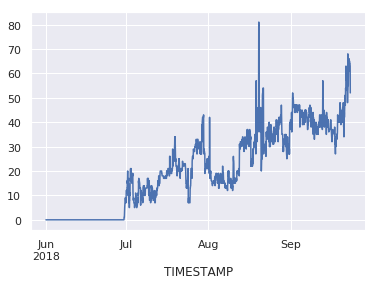

In [156]:
data2['active_deal_number'].plot()

In [157]:
df_connor = df[df.consumer_ID == "0x417c92FbD944b125A578848DE44a4FD9132E0911"]

In [158]:
df_connor.head()

,0,1,2,3,4,5,6,7,8,9,...,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes,duration_hours,total_revenue_USD
1,"{""deal"":{""id"":""8286""","""benchmarks"":{""values"":[501",1125,2,512000000,67108864,1000000,1000000,1,4234149888,...,0.008794,12.279,8286,0xFc5Ed3751d48e4498F7556618D536ad124B131F7,2018-09-20 17:09:17,2018-09-20 17:23:17,00:14:00,14.00,0.233333,0.002052
8,"{""deal"":{""id"":""3506""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,0.018117,21.959,3506,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,2018-08-14 06:32:43,2018-08-14 06:34:40,00:01:57,1.95,0.032500,0.000589
9,"{""deal"":{""id"":""8863""","""benchmarks"":{""values"":[508",1300,2,512000000,67108864,1000001,1000000,7,8513388544,...,0.149777,186.411,8863,0x416Af57F633e292b25976573a460d7C3200feD34,2018-09-21 14:56:08,2018-09-21 15:01:26,00:05:18,5.30,0.088333,0.013230
13,"{""deal"":{""id"":""2550""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,10,3163553792,...,0.322072,219.539,2550,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-30 12:57:40,2018-07-30 13:12:40,00:15:00,15.00,0.250000,0.080518
14,"{""deal"":{""id"":""8865""","""benchmarks"":{""values"":[510",2111,32,512000000,67108864,1000000,1000000,2,12786335744,...,0.057771,72.155,8865,0x94CE08B2018Ede760757eb2892591e9147033040,2018-09-21 14:59:44,2018-09-21 15:00:44,00:01:00,1.00,0.016667,0.000963


In [159]:
def calclate_connor_deals(time_stamp):
    return len(df_connor[(df_connor.starttime<time_stamp) & (df_connor.endtime>time_stamp)])

In [160]:
data['connor_deal_number'] = data['TIMESTAMP'].apply(calclate_connor_deals)

In [161]:
data2 = data.set_index('TIMESTAMP')

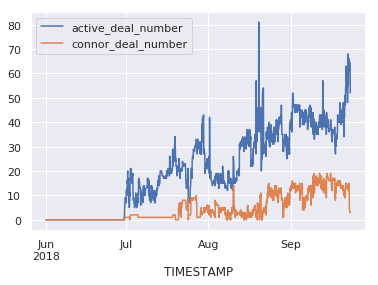

In [162]:
data2[['active_deal_number','connor_deal_number']].plot()

# CPU connor

0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7

In [163]:
df_CPUconnor = df[df.consumer_ID == "0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7"]

In [164]:
def calclate_CPUconnor_deals(time_stamp):
    return len(df_CPUconnor[(df_CPUconnor.starttime<time_stamp) & (df_CPUconnor.endtime>time_stamp)])

In [165]:
data['CPUconnor_deal_number'] = data['TIMESTAMP'].apply(calclate_CPUconnor_deals)

In [166]:
data2 = data.set_index('TIMESTAMP')

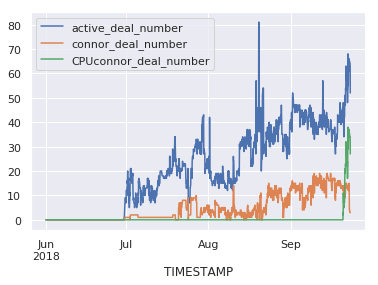

In [167]:
data2[['active_deal_number','connor_deal_number','CPUconnor_deal_number']].plot()

In [168]:
data.head()

,TIMESTAMP,TYPE,active_deal_number,connor_deal_number,CPUconnor_deal_number
0,2018-06-01 00:00:00,6,0,0,0
1,2018-06-01 01:00:00,1,0,0,0
2,2018-06-01 02:00:00,4,0,0,0
3,2018-06-01 03:00:00,8,0,0,0
4,2018-06-01 04:00:00,9,0,0,0


In [169]:
data.tail()

,TIMESTAMP,TYPE,active_deal_number,connor_deal_number,CPUconnor_deal_number
2743,2018-09-23 07:00:00,0,64,3,34
2744,2018-09-23 08:00:00,7,64,3,34
2745,2018-09-23 09:00:00,7,63,3,34
2746,2018-09-23 10:00:00,0,63,3,34
2747,2018-09-23 11:00:00,9,52,3,27


# calculate failed deal distribution

In [170]:
data.head()

,TIMESTAMP,TYPE,active_deal_number,connor_deal_number,CPUconnor_deal_number
0,2018-06-01 00:00:00,6,0,0,0
1,2018-06-01 01:00:00,1,0,0,0
2,2018-06-01 02:00:00,4,0,0,0
3,2018-06-01 03:00:00,8,0,0,0
4,2018-06-01 04:00:00,9,0,0,0


In [171]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes,duration_hours,total_revenue_USD
0,"{""deals"":[{""deal"":{""id"":""2219""","""benchmarks"":{""values"":[522",3938,1,536870912,67108864,1024,1024,1,8589934592,...,0.250000,42.625002,2219,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,2018-07-24 20:38:49,2018-07-24 20:40:16,00:01:27,1.45,0.024167,0.006042
1,"{""deal"":{""id"":""8286""","""benchmarks"":{""values"":[501",1125,2,512000000,67108864,1000000,1000000,1,4234149888,...,0.008794,12.279000,8286,0xFc5Ed3751d48e4498F7556618D536ad124B131F7,2018-09-20 17:09:17,2018-09-20 17:23:17,00:14:00,14.00,0.233333,0.002052
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,0.100000,79.806000,1,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 08:53:49,2018-06-30 09:15:10,00:21:21,21.35,0.355833,0.035583
3,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,0.100000,79.806000,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19,03:18:45,198.75,3.312500,0.331250
4,"{""deal"":{""id"":""2448""","""benchmarks"":{""values"":[2292",1129,6,1300000000,18012000000,50000000,50000000,0,0,...,0.000000,0.000000,2448,0x9da256F79Fa66Bb20626940e23590219a2b9746E,2018-07-28 16:49:49,2018-07-28 16:52:52,00:03:03,3.05,0.050833,0.000000


In [172]:
df_failed = df[df.duration_minutes <10]

In [173]:
df_successed = df[df.duration_minutes >10]

In [174]:
def calclate_failed_deals(time_stamp):
    return len(df_failed[(df_failed.starttime<time_stamp) & (df_failed.endtime>time_stamp)])

In [175]:
def calclate_successed_deals(time_stamp):
    return len(df_successed[(df_successed.starttime<time_stamp) & (df_successed.endtime>time_stamp)])

In [176]:
data['failed_deal_number'] = data['TIMESTAMP'].apply(calclate_failed_deals)

In [177]:
data['successed_deal_number'] = data['TIMESTAMP'].apply(calclate_successed_deals)

In [178]:
data2 = data.set_index('TIMESTAMP')

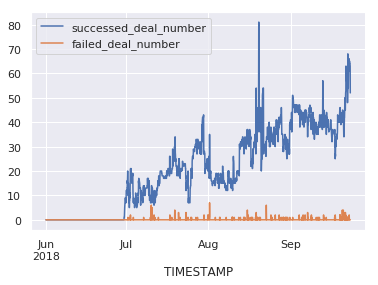

In [179]:
data2[['successed_deal_number','failed_deal_number']].plot()

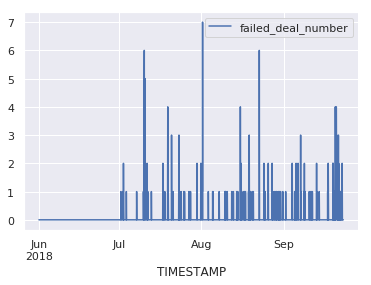

In [180]:
data2[['failed_deal_number']].plot()

# weekley need to move to the last

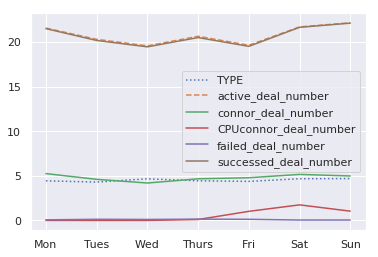

In [181]:
by_weekday = data2.groupby(data2.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

In [183]:
by_weekday

,TYPE,active_deal_number,connor_deal_number,CPUconnor_deal_number,failed_deal_number,successed_deal_number
Mon,4.554688,21.552083,5.244792,0.000000,0.065104,21.486979
Tues,4.450521,20.291667,4.601562,0.000000,0.127604,20.164062
Wed,4.531250,19.557292,4.190104,0.000000,0.109375,19.447917
Thurs,4.455729,20.632812,4.661458,0.101562,0.143229,20.489583
Fri,4.509804,19.627451,4.781863,1.017157,0.125000,19.502451
Sat,4.348039,21.681373,5.154412,1.742647,0.044118,21.637255
Sun,4.288608,22.073418,4.984810,0.972152,0.045570,22.027848


In [184]:
sns.barplot(x=by_weekday.index, y="total_Ethash", data=by_weekday)

ValueError: Could not interpret input 'total_Ethash'

In [ ]:
sns.barplot(x=by_weekday.index, y="active_deal_number", data=by_weekday)

In [ ]:
sns.barplot(x=by_weekday.index, y="supplier_number", data=by_weekday)

In [ ]:
by_hour = data2.groupby(data2.index.hour).mean()
#by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_hour.plot(style=[':', '--', '-']);

In [ ]:
by_hour['total_Ethash'].plot()

In [ ]:
sns.timeseries(y = 'total_Ethas',data = by_hour)

In [ ]:
sns.tsplot(by_hour.total_Ethash)
plt.ylabel('total_Ethash')
plt.xlabel('hours in a day')

In [ ]:
sns.tsplot(by_hour.active_deal_number)
plt.ylabel('active deals')
plt.xlabel('hours in a day')

# previously coded part

In [182]:
df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])].groupby('master_ID').describe()

Ethash                          \
                                            count        mean         std   
master_ID                                                                   
0x1bC66B0374C997cF9CB087Ef184975f174c053b5    1.0    0.000000         NaN   
0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4    1.0  172.350000         NaN   
0x25158E6f8dD683d222E3785BA2294A319489084E    1.0   22.179000         NaN   
0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f    1.0   12.220000         NaN   
0x3C63D359D86E6165a2eBe911caA822d90e85432C    1.0    0.000000         NaN   
0x416Af57F633e292b25976573a460d7C3200feD34    3.0  159.752333   26.604168   
0x424129085f9b7F0Cc07c47D077206d835a2A7B2b    1.0   30.105000         NaN   
0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA    3.0   26.442000   30.296063   
0x517648Ec2E592969Ec344642034F079c52AfD025    2.0   29.558500    4.094855   
0x61a2bB7A14177820F852afb95E3625b6A370079C    2.0    0.000000    0.000000   
0x6F6B9a47668D96b3758D79c67c30A290934a759F    1.0   19.778000         NaN   
0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce    1.0    0.000000         NaN   
0x8125721C2413d99a33E351e1F6Bb4e56b6b633FD    2.0    0.000005    0.000007   
0x87d341DF84A64b5289cf8A504F22cC10F509E9d6    1.0    0.000000         NaN   
0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01    1.0   21.959000         NaN   
0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE    1.0    0.000000         NaN   
0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD    1.0  165.157000         NaN   
0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F    1.0  129.860000         NaN   
0xED629b767Ff4894E38a5a15c1F7233edBdFb6A32    1.0    0.000000         NaN   
0xa90f716CF6ed3Bb999FE735B4C845b8DAf49672F    1.0   64.894000         NaN   
0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d    2.0   21.711000    0.005657   
0xd44b2f0705E51ec2B4F3B5EE4b0961e5127fdF82    1.0   85.636000         NaN   
0xedB7Ae4B946Cf249349974A02e354B5FBC577798    2.0  109.769500  155.237516   
0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3    6.0    0.000000    0.000000   

                                                                             \
                                                min         25%         50%   
master_ID                                                                     
0x1bC66B0374C997cF9CB087Ef184975f174c053b5    0.000    0.000000    0.000000   
0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4  172.350  172.350000  172.350000   
0x25158E6f8dD683d222E3785BA2294A319489084E   22.179   22.179000   22.179000   
0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f   12.220   12.220000   12.220000   
0x3C63D359D86E6165a2eBe911caA822d90e85432C    0.000    0.000000    0.000000   
0x416Af57F633e292b25976573a460d7C3200feD34  133.203  146.423000  159.643000   
0x424129085f9b7F0Cc07c47D077206d835a2A7B2b   30.105   30.105000   30.105000   
0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA    0.000    9.913500   19.827000   
0x517648Ec2E592969Ec344642034F079c52AfD025   26.663   28.110750   29.558500   
0x61a2bB7A14177820F852afb95E3625b6A370079C    0.000    0.000000    0.000000   
0x6F6B9a47668D96b3758D79c67c30A290934a759F   19.778   19.778000   19.778000   
0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce    0.000    0.000000    0.000000   
0x8125721C2413d99a33E351e1F6Bb4e56b6b633FD    0.000    0.000003    0.000005   
0x87d341DF84A64b5289cf8A504F22cC10F509E9d6    0.000    0.000000    0.000000   
0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01   21.959   21.959000   21.959000   
0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE    0.000    0.000000    0.000000   
0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD  165.157  165.157000  165.157000   
0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F  129.860  129.860000  129.860000   
0xED629b767Ff4894E38a5a15c1F7233edBdFb6A32    0.000    0.000000    0.000000   
0xa90f716CF6ed3Bb999FE735B4C845b8DAf49672F   64.894   64.894000   64.894000   
0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d   21.707   21.709000   21.711000   
0xd44b2f0705E51ec2B4F3B5EE4b0961e5127fdF82   85.636   85.636000   8

In [183]:
len(df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])].groupby('master_ID').describe())

24

In [184]:
def calclate_unique_supplier(time_stamp):
    return len(df[(df.starttime<time_stamp) & (df.endtime>time_stamp)].groupby('master_ID').describe())

In [185]:
calclate_unique_supplier(data['TIMESTAMP'][2000])

24

In [186]:
data['supplier_number'] = data['TIMESTAMP'].apply(calclate_unique_supplier)

In [187]:
data2 = data.set_index('TIMESTAMP')

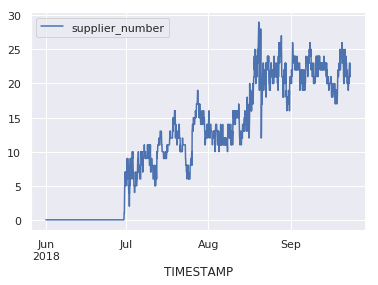

In [188]:
data2[['supplier_number']].plot()

In [189]:
def calclate_unique_consumer(time_stamp):
    return len(df[(df.starttime<time_stamp) & (df.endtime>time_stamp)].groupby('consumer_ID').describe())

In [190]:
data['consumerr_number'] = data['TIMESTAMP'].apply(calclate_unique_consumer)

In [191]:
data['consumer_number']= data['consumerr_number']

In [192]:
data2 = data.set_index('TIMESTAMP')

In [193]:
data2.head()

,TYPE,active_deal_number,connor_deal_number,CPUconnor_deal_number,failed_deal_number,successed_deal_number,supplier_number,consumerr_number,consumer_number
TIMESTAMP,,,,,,,,,
2018-06-01 00:00:00,6,0,0,0,0,0,0,0,0
2018-06-01 01:00:00,1,0,0,0,0,0,0,0,0
2018-06-01 02:00:00,4,0,0,0,0,0,0,0,0
2018-06-01 03:00:00,8,0,0,0,0,0,0,0,0
2018-06-01 04:00:00,9,0,0,0,0,0,0,0,0


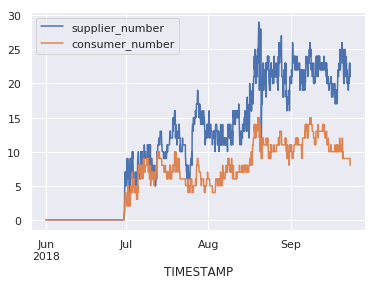

In [194]:
data2[['supplier_number','consumer_number']].plot()

In [195]:
df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])]['Ethash'].sum()

1604.7990100000002

In [196]:
def calclate_Ethash(time_stamp):
    return df[(df.starttime<time_stamp) & (df.endtime>time_stamp)]['Ethash'].sum()

In [197]:
data['total_Ethash'] = data['TIMESTAMP'].apply(calclate_Ethash)

In [198]:
data2 = data.set_index('TIMESTAMP')

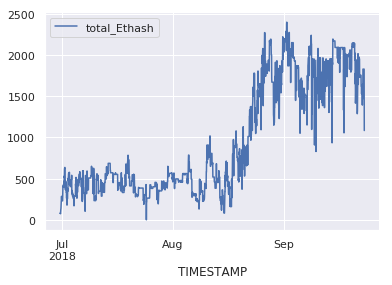

In [199]:
data2[['total_Ethash']].plot()

In [200]:
data['Ethash/deal'] = data['total_Ethash']/data['active_deal_number']

In [201]:
data2 = data.set_index('TIMESTAMP')

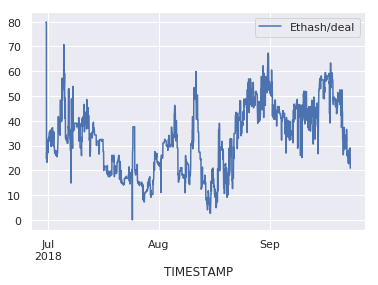

In [202]:
data2[['Ethash/deal']].plot()

In [203]:
data['Ethash/supplier'] = data['total_Ethash']/data['supplier_number']

In [204]:
data2 = data.set_index('TIMESTAMP')

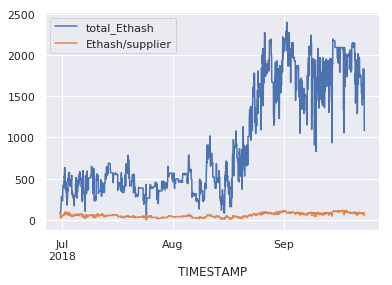

In [205]:
data2[['total_Ethash','Ethash/supplier']].plot()

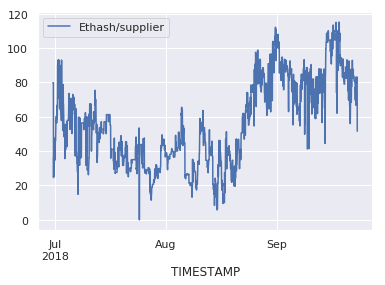

In [206]:
data2[['Ethash/supplier']].plot()

In [207]:
df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])]['duration_minutes'].mean()/60

395.44374397765353

In [208]:
df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])]['duration_minutes']

300      15067.950000
644      63861.016667
1738    104773.613341
2551     13658.600000
3936     10087.216667
4050     49048.761725
4062      4146.983333
4077      3919.650000
4336      3289.000000
4345      3919.300000
4475     14400.150000
4525      2422.900000
4563      9974.900000
4720      5113.066667
5216      3565.916667
5305      4694.116667
5582      8656.033333
5599        26.300000
5622       134.150000
5628       134.100000
5654       181.150000
5659      1198.850000
5674      2487.166667
5713      5117.666667
5722       659.500000
5921     10051.166667
5926      4737.766667
5935      3549.416667
5984      4779.266667
6026      2983.166667
6888     40294.450000
7039    104764.394861
7985     60091.699724
7992     60092.199758
7999     60078.299792
8014     99530.499875
8077     60061.650220
8094     60059.700307
Name: duration_minutes, dtype: float64

In [209]:
def mean_duration(timestamp):
    return df[(df.starttime<timestamp) & (df.endtime>timestamp)]['duration_minutes'].mean()/60
    

In [210]:
mean_duration(data['TIMESTAMP'][2000])

395.44374397765353

In [211]:
data['mean_duration_hour']=data['TIMESTAMP'].apply(mean_duration)

In [212]:
data2 = data.set_index('TIMESTAMP')

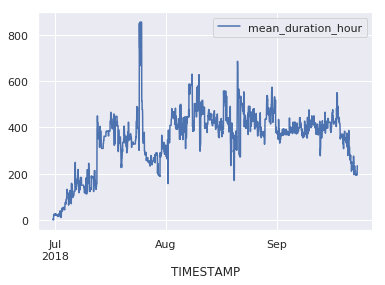

In [213]:
data2[['mean_duration_hour']].plot()

In [214]:
df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])]['duration_minutes']

300      15067.950000
644      63861.016667
1738    104773.613341
2551     13658.600000
3936     10087.216667
4050     49048.761725
4062      4146.983333
4077      3919.650000
4336      3289.000000
4345      3919.300000
4475     14400.150000
4525      2422.900000
4563      9974.900000
4720      5113.066667
5216      3565.916667
5305      4694.116667
5582      8656.033333
5599        26.300000
5622       134.150000
5628       134.100000
5654       181.150000
5659      1198.850000
5674      2487.166667
5713      5117.666667
5722       659.500000
5921     10051.166667
5926      4737.766667
5935      3549.416667
5984      4779.266667
6026      2983.166667
6888     40294.450000
7039    104764.394861
7985     60091.699724
7992     60092.199758
7999     60078.299792
8014     99530.499875
8077     60061.650220
8094     60059.700307
Name: duration_minutes, dtype: float64

# Connor time stamp and profitability

In [215]:
df_connor.head()

,0,1,2,3,4,5,6,7,8,9,...,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes,duration_hours,total_revenue_USD
1,"{""deal"":{""id"":""8286""","""benchmarks"":{""values"":[501",1125,2,512000000,67108864,1000000,1000000,1,4234149888,...,0.008794,12.279,8286,0xFc5Ed3751d48e4498F7556618D536ad124B131F7,2018-09-20 17:09:17,2018-09-20 17:23:17,00:14:00,14.00,0.233333,0.002052
8,"{""deal"":{""id"":""3506""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,0.018117,21.959,3506,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,2018-08-14 06:32:43,2018-08-14 06:34:40,00:01:57,1.95,0.032500,0.000589
9,"{""deal"":{""id"":""8863""","""benchmarks"":{""values"":[508",1300,2,512000000,67108864,1000001,1000000,7,8513388544,...,0.149777,186.411,8863,0x416Af57F633e292b25976573a460d7C3200feD34,2018-09-21 14:56:08,2018-09-21 15:01:26,00:05:18,5.30,0.088333,0.013230
13,"{""deal"":{""id"":""2550""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,10,3163553792,...,0.322072,219.539,2550,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-30 12:57:40,2018-07-30 13:12:40,00:15:00,15.00,0.250000,0.080518
14,"{""deal"":{""id"":""8865""","""benchmarks"":{""values"":[510",2111,32,512000000,67108864,1000000,1000000,2,12786335744,...,0.057771,72.155,8865,0x94CE08B2018Ede760757eb2892591e9147033040,2018-09-21 14:59:44,2018-09-21 15:00:44,00:01:00,1.00,0.016667,0.000963


In [216]:
df_connor[(df_connor.starttime<data['TIMESTAMP'][2000]) & (df_connor.endtime>data['TIMESTAMP'][2000])]

,0,1,2,3,4,5,6,7,8,9,...,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes,duration_hours,total_revenue_USD
5216,"{""deal"":{""id"":""4818""","""benchmarks"":{""values"":[109",1522,8,512000000,67108864,1000000,1000000,1,4292050944,...,0.018727,21.707,4818,0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d,2018-08-22 20:57:13,2018-08-25 08:23:08,2 days 11:25:55,3565.916667,59.431944,1.112997
5305,"{""deal"":{""id"":""4835""","""benchmarks"":{""values"":[108",1113,8,512000000,67108864,1000000,1000001,1,6368002048,...,0.017390,19.778,4835,0x6F6B9a47668D96b3758D79c67c30A290934a759F,2018-08-22 21:09:25,2018-08-26 03:23:32,3 days 06:14:07,4694.116667,78.235278,1.360480
5599,"{""deal"":{""id"":""4883""","""benchmarks"":{""values"":[103",1288,2,512000000,67108864,1000000,1000000,6,8152825856,...,0.147143,165.157,4883,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,2018-08-23 07:58:52,2018-08-23 08:25:10,0 days 00:26:18,26.300000,0.438333,0.064498
5622,"{""deal"":{""id"":""4878""","""benchmarks"":{""values"":[104",1949,16,512000000,67108864,1000001,1000000,1,6373244928,...,0.017390,19.827,4878,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,2018-08-23 06:28:28,2018-08-23 08:42:37,0 days 02:14:09,134.150000,2.235833,0.038880
5628,"{""deal"":{""id"":""4879""","""benchmarks"":{""values"":[104",1949,16,512000000,67108864,1000001,1000000,3,6372196352,...,0.050831,59.499,4879,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,2018-08-23 06:28:52,2018-08-23 08:42:58,0 days 02:14:06,134.100000,2.235000,0.113608
5674,"{""deal"":{""id"":""4874""","""benchmarks"":{""values"":[104",1301,2,512000000,67108864,1000000,1000000,5,8513388544,...,0.115931,133.203,4874,0x416Af57F633e292b25976573a460d7C3200feD34,2018-08-23 04:05:13,2018-08-24 21:32:23,1 days 17:27:10,2487.166667,41.452778,4.805646
5722,"{""deal"":{""id"":""4875""","""benchmarks"":{""values"":[108",1094,2,512000000,67108864,1000000,1000000,6,8507097088,...,0.150264,172.350,4875,0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4,2018-08-23 04:07:49,2018-08-23 15:07:19,0 days 10:59:30,659.500000,10.991667,1.651651
5926,"{""deal"":{""id"":""4837""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,1,8513388544,...,0.023186,26.663,4837,0x517648Ec2E592969Ec344642034F079c52AfD025,2018-08-22 21:15:43,2018-08-26 04:13:29,3 days 06:57:46,4737.766667,78.962778,1.830841
5935,"{""deal"":{""id"":""4836""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,1,11718885376,...,0.028091,32.454,4836,0x517648Ec2E592969Ec344642034F079c52AfD025,2018-08-22 21:15:13,2018-08-25 08:24:38,2 days 11:09:25,3549.416667,59.156944,1.661771
5984,"{""deal"":{""id"":""4830""","""benchmarks"":{""values"":[109",1522,8,512000000,67108864,1000000,1000000,1,4292050944,...,0.018727,21.715,4830,0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d,2018-08-22 21:04:13,2018-08-26 04:43:29,3 days 07:39:16,4779.266667,79.654444,1.491709


In [217]:
df_connor[(df_connor.starttime<data['TIMESTAMP'][2000]) & (df_connor.endtime>data['TIMESTAMP'][2000])]['Ethash'].sum()

702.45799999999997

In [218]:
df_connor[(df_connor.starttime<data['TIMESTAMP'][2000]) & (df_connor.endtime>data['TIMESTAMP'][2000])]['price_USD/h'].sum()

0.61288928999999981

In [219]:
df_connor[(df_connor.starttime<data['TIMESTAMP'][2000]) & (df_connor.endtime>data['TIMESTAMP'][2000])]['price_USD/h'].sum()/df_connor[(df_connor.starttime<data['TIMESTAMP'][2000]) & (df_connor.endtime>data['TIMESTAMP'][2000])]['Ethash'].sum()

0.00087249243371133908

In [220]:
def profitability(timestamp):
    ethash = df_connor[(df_connor.starttime<timestamp) & (df_connor.endtime>timestamp)]['Ethash'].sum()
    price = df_connor[(df_connor.starttime<timestamp) & (df_connor.endtime>timestamp)]['price_USD/h'].sum()
    return price/ethash

In [221]:
profitability(data['TIMESTAMP'][2000])

0.00087249243371133908

In [222]:
data['profitability USD/h per Mh/s']=data['TIMESTAMP'].apply(profitability)

In [223]:
data2 = data.set_index('TIMESTAMP')

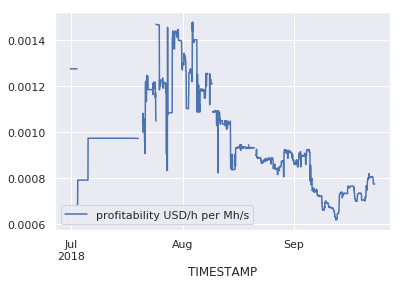

In [224]:
data2[['profitability USD/h per Mh/s']].plot()

In [225]:
data2.iloc[2000]

TYPE                               4.000000
active_deal_number                38.000000
connor_deal_number                11.000000
CPUconnor_deal_number              0.000000
failed_deal_number                 0.000000
successed_deal_number             38.000000
supplier_number                   24.000000
consumerr_number                  12.000000
consumer_number                   12.000000
total_Ethash                    1604.799010
Ethash/deal                       42.231553
Ethash/supplier                   66.866625
mean_duration_hour               395.443744
profitability USD/h per Mh/s       0.000872
Name: 2018-08-23 08:00:00, dtype: float64

In [226]:
def profitability_total(timestamp):
    ethash = df[(df.starttime<timestamp) & (df.endtime>timestamp)]['Ethash'].sum()
    price = df[(df.starttime<timestamp) & (df.endtime>timestamp)]['price_USD/h'].sum()
    return price/ethash

In [227]:
data['total_profitability USD/h per Mh/s']=data['TIMESTAMP'].apply(profitability_total)

In [228]:
data2 = data.set_index('TIMESTAMP')

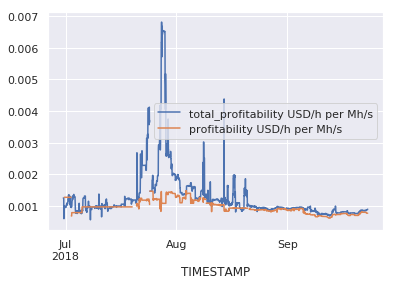

In [229]:
data2[['total_profitability USD/h per Mh/s','profitability USD/h per Mh/s']].plot()

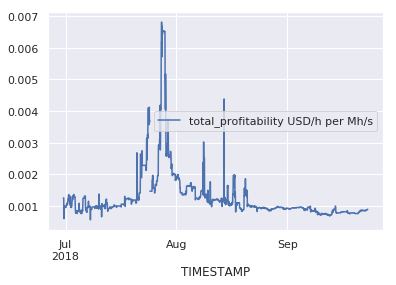

In [230]:
data2[['total_profitability USD/h per Mh/s']].plot()

In [231]:
data.tail()

,TIMESTAMP,TYPE,active_deal_number,connor_deal_number,CPUconnor_deal_number,failed_deal_number,successed_deal_number,supplier_number,consumerr_number,consumer_number,total_Ethash,Ethash/deal,Ethash/supplier,mean_duration_hour,profitability USD/h per Mh/s,total_profitability USD/h per Mh/s
2743,2018-09-23 07:00:00,0,64,3,34,0,64,23,9,9,1828.245,28.566328,79.488913,195.610090,0.000774,0.000884
2744,2018-09-23 08:00:00,7,64,3,34,0,64,23,9,9,1828.245,28.566328,79.488913,195.555528,0.000774,0.000884
2745,2018-09-23 09:00:00,7,63,3,34,0,63,22,8,8,1828.245,29.019762,83.102045,194.850060,0.000774,0.000884
2746,2018-09-23 10:00:00,0,63,3,34,0,63,22,8,8,1828.245,29.019762,83.102045,194.850060,0.000774,0.000884
2747,2018-09-23 11:00:00,9,52,3,27,0,52,21,8,8,1082.987,20.826673,51.570810,234.138416,0.000774,0.000901


# Consumers who left SONM

In [351]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xdEE7E9955b8e462bD661c692cd703F2911DD5C8b,0.000100,0.000,4698,0x24E192b02d33501f225580d6B19A8d97C5190D45,2018-08-21 17:25:49,2018-08-21 19:39:19,02:13:30,133.50
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.019963,31.458,720,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-09 23:16:40,2018-07-09 23:17:37,00:00:57,0.95
2,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131,3963,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-08-17 03:21:17,2018-08-17 03:26:26,00:05:09,5.15
3,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959,4342,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,2018-08-19 02:56:02,2018-08-19 02:57:53,00:01:51,1.85
4,"{""deal"":{""id"":""4""","""benchmarks"":{""values"":[1002",1527,36,2000000000,67108864,10000000,10000000,1,4234149888,...,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0xEBB9099c31EF1C72a2E597cD4c02051C43C24Ebd,0.015535,13.125,4,0xd0ecfF77c5B50BAB4D865CB1254A14ddfA05A6F0,2018-06-30 12:31:01,2018-06-30 12:55:46,00:24:45,24.75


In [352]:
df.groupby('consumer_ID').describe()['Ethash']

,count,mean,std,min,25%,50%,75%,max
consumer_ID,,,,,,,,
0x04d97A8A4dC6446855f79a55F5caAc571AA207Ec,1.0,0.000000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000
0x0bF957203A68367c344c7B6b60729Fc8354915ef,2.0,19.474500,10.103849,12.33000,15.90225,19.47450,23.04675,26.61900
0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,42.384800,14.110975,12.33000,29.80000,46.57000,53.25900,79.88400
0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,457.0,44.632961,58.784476,0.00000,0.00000,21.77100,46.58000,219.57900
0x1a13173445903d59B1567378989590e6b15A16B7,11.0,20.933455,4.189422,15.62300,18.10500,19.96400,24.51350,26.63500
0x201CDce452A3FE1a9baCfaD7f596429D36508f05,1.0,0.000000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000
0x22d709876F24Da89933008Cd714A1CB3B29090eE,6.0,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4,2.0,172.350000,0.000000,172.35000,172.35000,172.35000,172.35000,172.35000
0x25158E6f8dD683d222E3785BA2294A319489084E,3.0,5.415333,9.379632,0.00000,0.00000,0.00000,8.12300,16.24600


In [353]:
df_consumer = df.groupby('consumer_ID').describe()['Ethash']

In [354]:
df_consumer.to_csv('consumer.csv')

In [355]:
df_consumer = pd.read_csv('consumer.csv')

In [356]:
df_consumer.head()

,consumer_ID,count,mean,std,min,25%,50%,75%,max
0,0x04d97A8A4dC6446855f79a55F5caAc571AA207Ec,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000
1,0x0bF957203A68367c344c7B6b60729Fc8354915ef,2.0,19.474500,10.103849,12.330,15.90225,19.4745,23.04675,26.619
2,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,42.384800,14.110975,12.330,29.80000,46.5700,53.25900,79.884
3,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,457.0,44.632961,58.784476,0.000,0.00000,21.7710,46.58000,219.579
4,0x1a13173445903d59B1567378989590e6b15A16B7,11.0,20.933455,4.189422,15.623,18.10500,19.9640,24.51350,26.635


In [357]:
df_consumer['consumer_ID'][0]

'0x04d97A8A4dC6446855f79a55F5caAc571AA207Ec'

In [358]:
df[df.consumer_ID== df_consumer['consumer_ID'][0]]['endtime'].max()

Timestamp('2018-09-13 05:40:20')

In [359]:
df[df.consumer_ID== df_consumer['consumer_ID'][0]]['endtime'].max() < pd.Timestamp(2018, 9, 1)

False

In [360]:
pd.Timestamp(2018, 9, 1, 12)

Timestamp('2018-09-01 12:00:00')

In [361]:
def supplier_left(ID):
    return df[df.consumer_ID == ID]['endtime'].max() < pd.Timestamp(2018, 9, 1)

In [362]:
df_consumer['left_before_September'] = df_consumer['consumer_ID'].apply(supplier_left)

In [363]:
df_consumer

,consumer_ID,count,mean,std,min,25%,50%,75%,max,left_before_September
0,0x04d97A8A4dC6446855f79a55F5caAc571AA207Ec,1.0,0.000000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,False
1,0x0bF957203A68367c344c7B6b60729Fc8354915ef,2.0,19.474500,10.103849,12.33000,15.90225,19.47450,23.04675,26.61900,True
2,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,42.384800,14.110975,12.33000,29.80000,46.57000,53.25900,79.88400,True
3,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,457.0,44.632961,58.784476,0.00000,0.00000,21.77100,46.58000,219.57900,False
4,0x1a13173445903d59B1567378989590e6b15A16B7,11.0,20.933455,4.189422,15.62300,18.10500,19.96400,24.51350,26.63500,True
5,0x201CDce452A3FE1a9baCfaD7f596429D36508f05,1.0,0.000000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,False
6,0x22d709876F24Da89933008Cd714A1CB3B29090eE,6.0,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,True
7,0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4,2.0,172.350000,0.000000,172.35000,172.35000,172.35000,172.35000,172.35000,True
8,0x25158E6f8dD683d222E3785BA2294A319489084E,3.0,5.415333,9.379632,0.00000,0.00000,0.00000,8.12300,16.24600,False
9,0x332fd6bD3bcD15aAEfF913cAF725184D1a5630F7,1.0,0.000000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,False


In [364]:
df_consumer[df_consumer.left_before_September]

,consumer_ID,count,mean,std,min,25%,50%,75%,max,left_before_September
1,0x0bF957203A68367c344c7B6b60729Fc8354915ef,2.0,19.474500,10.103849,12.33000,15.90225,19.47450,23.04675,26.61900,True
2,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,42.384800,14.110975,12.33000,29.80000,46.57000,53.25900,79.88400,True
4,0x1a13173445903d59B1567378989590e6b15A16B7,11.0,20.933455,4.189422,15.62300,18.10500,19.96400,24.51350,26.63500,True
6,0x22d709876F24Da89933008Cd714A1CB3B29090eE,6.0,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,True
7,0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4,2.0,172.350000,0.000000,172.35000,172.35000,172.35000,172.35000,172.35000,True
11,0x384B08b25B4B78eb43969b2500999d1Ac3c82007,30.0,19.463167,43.891490,0.00000,0.00000,0.00000,22.57875,172.35000,True
12,0x4138Feb376d3a85ebD4E211fa8A7dAd081575494,1.0,53.251000,NaN,53.25100,53.25100,53.25100,53.25100,53.25100,True
14,0x4567Da76D1c0239c21b33fa9aD767E9188108c0e,1.0,0.000000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,True
15,0x47700c0f8c34a42BA88B35c9E67E5A925c7BF245,23.0,27.677609,24.115005,0.00000,0.00000,32.29200,50.84300,59.39500,True
18,0x5139732b07cD630E13F852Dd92c4cA3DC625e7E9,1.0,0.000010,NaN,0.00001,0.00001,0.00001,0.00001,0.00001,True


In [365]:
len(df_consumer[df_consumer.left_before_September])

34

In [366]:
df_consumer[df_consumer.left_before_September]['consumer_ID']

1     0x0bF957203A68367c344c7B6b60729Fc8354915ef
2     0x1124fCC307756f4077c5e8E09b948C1CA7123eC9
4     0x1a13173445903d59B1567378989590e6b15A16B7
6     0x22d709876F24Da89933008Cd714A1CB3B29090eE
7     0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4
11    0x384B08b25B4B78eb43969b2500999d1Ac3c82007
12    0x4138Feb376d3a85ebD4E211fa8A7dAd081575494
14    0x4567Da76D1c0239c21b33fa9aD767E9188108c0e
15    0x47700c0f8c34a42BA88B35c9E67E5A925c7BF245
18    0x5139732b07cD630E13F852Dd92c4cA3DC625e7E9
19    0x517648Ec2E592969Ec344642034F079c52AfD025
21    0x63dA2009Ff928f99D960F48CBDd76C5a3E8591c4
22    0x65A235FFf4F2c6344642c417cb4cE9fA698A5d2b
23    0x67588f2F50227F200B3dd6bd2Bf23076A27C18Ea
25    0x73208ae757b5a5747d79da4a08ba4FB3012ef0E8
26    0x75CA26f23e0fC696af5Cb135b0ABfD53807691fE
27    0x75f554D5298c25C14De9D4BF12c6C1e19F9DB752
29    0x77D216e0D9EDb9e99AC1c34152C52e7d9F799117
30    0x87d341DF84A64b5289cf8A504F22cC10F509E9d6
31    0x921DfF043950872280116dC949e675A5e1aC726D
32    0x9da256F79Fa6

# Suppliers who left SONM

In [367]:
df.groupby('master_ID').describe()['Ethash']

,count,mean,std,min,25%,50%,75%,max
master_ID,,,,,,,,
0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,48.841000,0.000000e+00,48.841,48.8410,48.8410,48.84100,48.841
0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,43.452000,0.000000e+00,43.452,43.4520,43.4520,43.45200,43.452
0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,0.000000,NaN,0.000,0.0000,0.0000,0.00000,0.000
0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,159.800000,0.000000e+00,159.800,159.8000,159.8000,159.80000,159.800
0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,157.0,182.553357,6.543643e+01,34.270,137.1620,205.7680,239.88100,240.009
0x197B93384DE6572D9c282C44D45588B0e902C266,43.0,16.082442,2.222325e-01,15.271,16.1610,16.1610,16.16100,16.161
0x1a13173445903d59B1567378989590e6b15A16B7,10.0,16.246000,3.744889e-15,16.246,16.2460,16.2460,16.24600,16.246
0x1bC66B0374C997cF9CB087Ef184975f174c053b5,2.0,0.000000,0.000000e+00,0.000,0.0000,0.0000,0.00000,0.000
0x2031851e4d38A850A6A3527597d53D66928332a7,17.0,0.000000,0.000000e+00,0.000,0.0000,0.0000,0.00000,0.000


In [368]:
df_master = df.groupby('master_ID').describe()['Ethash']

In [369]:
df_master.to_csv('master.csv')

In [370]:
df_master = pd.read_csv('master.csv')

In [371]:
df_master.head()

,master_ID,count,mean,std,min,25%,50%,75%,max
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,48.841000,0.000000,48.841,48.841,48.841,48.841,48.841
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,43.452000,0.000000,43.452,43.452,43.452,43.452,43.452
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,0.000000,NaN,0.000,0.000,0.000,0.000,0.000
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,159.800000,0.000000,159.800,159.800,159.800,159.800,159.800
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,157.0,182.553357,65.436428,34.270,137.162,205.768,239.881,240.009


In [372]:
def supplier_left(ID):
    return df[df.master_ID == ID]['endtime'].max() < pd.Timestamp(2018, 9, 1)

In [373]:
df_master['left_before_September'] = df_master['master_ID'].apply(supplier_left)

In [374]:
df_master

,master_ID,count,mean,std,min,25%,50%,75%,max,left_before_September
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,48.841000,0.000000e+00,48.841,48.8410,48.8410,48.84100,48.841,True
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,43.452000,0.000000e+00,43.452,43.4520,43.4520,43.45200,43.452,True
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,0.000000,NaN,0.000,0.0000,0.0000,0.00000,0.000,True
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,159.800000,0.000000e+00,159.800,159.8000,159.8000,159.80000,159.800,True
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,157.0,182.553357,6.543643e+01,34.270,137.1620,205.7680,239.88100,240.009,False
5,0x197B93384DE6572D9c282C44D45588B0e902C266,43.0,16.082442,2.222325e-01,15.271,16.1610,16.1610,16.16100,16.161,True
6,0x1a13173445903d59B1567378989590e6b15A16B7,10.0,16.246000,3.744889e-15,16.246,16.2460,16.2460,16.24600,16.246,False
7,0x1bC66B0374C997cF9CB087Ef184975f174c053b5,2.0,0.000000,0.000000e+00,0.000,0.0000,0.0000,0.00000,0.000,False
8,0x2031851e4d38A850A6A3527597d53D66928332a7,17.0,0.000000,0.000000e+00,0.000,0.0000,0.0000,0.00000,0.000,True
9,0x21dd5b54664222AbD2E0F43efbDc9F3C592874f1,19.0,13.253000,1.825033e-15,13.253,13.2530,13.2530,13.25300,13.253,True


In [375]:
df_master[df_master.left_before_September]

,master_ID,count,mean,std,min,25%,50%,75%,max,left_before_September
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,48.841000,0.000000e+00,48.841,48.84100,48.8410,48.84100,48.841,True
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,43.452000,0.000000e+00,43.452,43.45200,43.4520,43.45200,43.452,True
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000,True
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,159.800000,0.000000e+00,159.800,159.80000,159.8000,159.80000,159.800,True
5,0x197B93384DE6572D9c282C44D45588B0e902C266,43.0,16.082442,2.222325e-01,15.271,16.16100,16.1610,16.16100,16.161,True
8,0x2031851e4d38A850A6A3527597d53D66928332a7,17.0,0.000000,0.000000e+00,0.000,0.00000,0.0000,0.00000,0.000,True
9,0x21dd5b54664222AbD2E0F43efbDc9F3C592874f1,19.0,13.253000,1.825033e-15,13.253,13.25300,13.2530,13.25300,13.253,True
10,0x22E00835bD4b84456Ab3aA5E61a7FF07AB57b4A8,1.0,24.722000,NaN,24.722,24.72200,24.7220,24.72200,24.722,True
11,0x22d709876F24Da89933008Cd714A1CB3B29090eE,27.0,0.000000,0.000000e+00,0.000,0.00000,0.0000,0.00000,0.000,True
12,0x24E192b02d33501f225580d6B19A8d97C5190D45,41.0,17.353463,1.584721e+01,0.000,0.00000,31.8040,31.80400,31.804,True


In [376]:
def supplier_joins(ID):
    return df[df.master_ID == ID]['starttime'].min() > pd.Timestamp(2018, 9, 1)

In [377]:
df_master['joined_after_September'] = df_master['master_ID'].apply(supplier_joins)

In [378]:
df_master[df_master.joined_after_September]

,master_ID,count,mean,std,min,25%,50%,75%,max,left_before_September,joined_after_September
22,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,28.0,90.676286,39.625478,0.000,64.9920,76.731,124.66725,141.723,False,True
25,0x3acA407923bAaA8A609Ae6828A6A9dF822ee2026,1.0,0.000000,NaN,0.000,0.0000,0.000,0.00000,0.000,False,True
29,0x461a6357Aa4381d51965248244b38508c1acDaF8,2.0,24.815000,0.000000,24.815,24.8150,24.815,24.81500,24.815,False,True
31,0x4C68C5e2684DB73FFF8c2e9A0b3f990F9235FE24,1.0,0.000000,NaN,0.000,0.0000,0.000,0.00000,0.000,False,True
48,0x6bdAc2AE57AA8325206bDD076e3022b12D64a4b6,3.0,0.000000,0.000000,0.000,0.0000,0.000,0.00000,0.000,False,True
62,0x8d95626316f77F09736dC4256Cc5C29674852148,1.0,0.000000,NaN,0.000,0.0000,0.000,0.00000,0.000,False,True
63,0x904720c59EAA497dD6ed04ea46E15a4C76C99f63,7.0,83.473000,66.014432,19.092,38.7105,58.329,126.72250,176.024,False,True
66,0x943957E38539A4AD9E681Dbf2d7B8B26b56E349a,2.0,0.000000,0.000000,0.000,0.0000,0.000,0.00000,0.000,False,True
83,0xD797292d9983a2327CCDe642FEcD411f85cCBbCa,6.0,245.889000,9.145871,237.540,237.5400,245.889,254.23800,254.238,False,True
89,0xF17e32717B6792C6bE8ABbe06E95E86b004d8573,1.0,0.000000,NaN,0.000,0.0000,0.000,0.00000,0.000,False,True


In [379]:
df_master['total_Ethash']= df_master['mean']*df_master['count']

In [380]:
df_master[df_master.joined_after_September][['master_ID','count','total_Ethash']].sort_values('total_Ethash', ascending = False)

,master_ID,count,total_Ethash
22,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,28.0,2538.936
83,0xD797292d9983a2327CCDe642FEcD411f85cCBbCa,6.0,1475.334
63,0x904720c59EAA497dD6ed04ea46E15a4C76C99f63,7.0,584.311
29,0x461a6357Aa4381d51965248244b38508c1acDaF8,2.0,49.630
25,0x3acA407923bAaA8A609Ae6828A6A9dF822ee2026,1.0,0.000
31,0x4C68C5e2684DB73FFF8c2e9A0b3f990F9235FE24,1.0,0.000
48,0x6bdAc2AE57AA8325206bDD076e3022b12D64a4b6,3.0,0.000
62,0x8d95626316f77F09736dC4256Cc5C29674852148,1.0,0.000
66,0x943957E38539A4AD9E681Dbf2d7B8B26b56E349a,2.0,0.000
89,0xF17e32717B6792C6bE8ABbe06E95E86b004d8573,1.0,0.000


In [381]:
def early_adopters(ID):
    return df[df.master_ID == ID]['starttime'].max() < pd.Timestamp(2018, 7, 8)

In [382]:
df_master['joined_before_midJuly'] = df_master['master_ID'].apply(early_adopters)

In [383]:
df_master.head()

,master_ID,count,mean,std,min,25%,50%,75%,max,left_before_September,joined_after_September,total_Ethash,joined_before_midJuly
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,48.841000,0.000000,48.841,48.841,48.841,48.841,48.841,True,False,97.682,False
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,43.452000,0.000000,43.452,43.452,43.452,43.452,43.452,True,False,86.904,False
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,0.000000,NaN,0.000,0.000,0.000,0.000,0.000,True,False,0.000,True
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,159.800000,0.000000,159.800,159.800,159.800,159.800,159.800,True,False,7990.000,False
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,157.0,182.553357,65.436428,34.270,137.162,205.768,239.881,240.009,False,False,28660.877,False


In [384]:
df_master[df_master.joined_before_midJuly][['master_ID','count','total_Ethash','left_before_September']].sort_values('total_Ethash', ascending = False)

,master_ID,count,total_Ethash,left_before_September
51,0x707ACE0EDF8A3451DB339ae7E66a180a4C5D5cB7,118.0,4034.730,True
115,0xf5291bFDAA9324c42BEf942eCfC971EB95D56b33,28.0,1130.947,True
81,0xC4Ce0CCc35c0c1D1767DC4424C3eeD537b7CC62f,23.0,1111.821,True
40,0x61721F7695a3421FDf15b984f76EF4b6cD921EB4,24.0,879.838,True
114,0xf38487Ef55787A7921086E66C908ac000f01DbE2,21.0,405.447,True
80,0xC3842f9ad5d0a9Fbc9877Aa6Df53521aF1Ab4696,12.0,384.127,True
67,0x958e52955dB5966a80a6f4A9ab98c74d121CF753,18.0,221.956,True
32,0x4a7c2861127A7E0354B60f39EB7F478A1d1222bd,6.0,168.324,True
75,0xA6c5F4d12332A341F0253C9fC5ECf028719848fc,7.0,146.440,True
100,0xb3A8866183ca88ED3c233337C4f85045a2aD7d1F,1.0,27.459,True


In [385]:
df_master.head()

,master_ID,count,mean,std,min,25%,50%,75%,max,left_before_September,joined_after_September,total_Ethash,joined_before_midJuly
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,48.841000,0.000000,48.841,48.841,48.841,48.841,48.841,True,False,97.682,False
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,43.452000,0.000000,43.452,43.452,43.452,43.452,43.452,True,False,86.904,False
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,0.000000,NaN,0.000,0.000,0.000,0.000,0.000,True,False,0.000,True
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,159.800000,0.000000,159.800,159.800,159.800,159.800,159.800,True,False,7990.000,False
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,157.0,182.553357,65.436428,34.270,137.162,205.768,239.881,240.009,False,False,28660.877,False


In [386]:
def joined_August(ID):
    if df[df.master_ID == ID]['starttime'].max() < pd.Timestamp(2018, 9, 1):
        if df[df.master_ID == ID]['endtime'].max() >pd.Timestamp(2018, 8, 1):
            return True
        else:
            return False
    else:
        return False
        

In [387]:
df_master['joined_August'] = df_master['master_ID'].apply(joined_August)

In [388]:
df_master[df_master.joined_August]

,master_ID,count,mean,std,min,25%,50%,75%,max,left_before_September,joined_after_September,total_Ethash,joined_before_midJuly,joined_August
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,48.841000,0.000000e+00,48.84100,48.84100,48.84100,48.84100,48.84100,True,False,97.68200,False,True
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,43.452000,0.000000e+00,43.45200,43.45200,43.45200,43.45200,43.45200,True,False,86.90400,False,True
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,159.800000,0.000000e+00,159.80000,159.80000,159.80000,159.80000,159.80000,True,False,7990.00000,False,True
5,0x197B93384DE6572D9c282C44D45588B0e902C266,43.0,16.082442,2.222325e-01,15.27100,16.16100,16.16100,16.16100,16.16100,True,False,691.54500,False,True
7,0x1bC66B0374C997cF9CB087Ef184975f174c053b5,2.0,0.000000,0.000000e+00,0.00000,0.00000,0.00000,0.00000,0.00000,False,False,0.00000,False,True
8,0x2031851e4d38A850A6A3527597d53D66928332a7,17.0,0.000000,0.000000e+00,0.00000,0.00000,0.00000,0.00000,0.00000,True,False,0.00000,False,True
11,0x22d709876F24Da89933008Cd714A1CB3B29090eE,27.0,0.000000,0.000000e+00,0.00000,0.00000,0.00000,0.00000,0.00000,True,False,0.00000,False,True
12,0x24E192b02d33501f225580d6B19A8d97C5190D45,41.0,17.353463,1.584721e+01,0.00000,0.00000,31.80400,31.80400,31.80400,True,False,711.49200,False,True
13,0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4,67.0,133.448657,4.918008e+01,27.11200,86.17500,172.35000,172.35000,176.90000,True,False,8941.06000,False,True
20,0x2c743F2731c5803A649695930DD09a82Bba2B9c6,4.0,0.000000,0.000000e+00,0.00000,0.00000,0.00000,0.00000,0.00000,True,False,0.00000,False,True


In [389]:
def joined_July(ID):
    if df[df.master_ID == ID]['starttime'].max() < pd.Timestamp(2018, 8, 1):
        if df[df.master_ID == ID]['endtime'].max() >pd.Timestamp(2018, 7, 1):
            return True
        else:
            return False
    else:
        return False
        

In [390]:
df_master['joined_July'] = df_master['master_ID'].apply(joined_July)

In [391]:
df_master[df_master.joined_July]

,master_ID,count,mean,std,min,25%,50%,75%,max,left_before_September,joined_after_September,total_Ethash,joined_before_midJuly,joined_August,joined_July
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,True,False,0.000000,True,False,True
9,0x21dd5b54664222AbD2E0F43efbDc9F3C592874f1,19.0,13.253000,1.825033e-15,13.253000,13.253000,13.253000,13.253000,13.253000,True,False,251.807000,False,False,True
19,0x29E86F84A2D550deA9976d2a0198eBdD4BAB006b,1.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,True,False,0.000000,False,False,True
21,0x2ff5E25E63294728F2D0B10bAA36223E6D98702C,1.0,53.175000,NaN,53.175000,53.175000,53.175000,53.175000,53.175000,True,False,53.175000,False,False,True
30,0x4AADcF4719a29C2bcC8481eddf848a5F3Cfc4fC1,3.0,8.292667,7.851964e-02,8.202000,8.270000,8.338000,8.338000,8.338000,True,False,24.878000,False,False,True
32,0x4a7c2861127A7E0354B60f39EB7F478A1d1222bd,6.0,28.054000,1.054501e+01,21.252000,21.254250,21.261000,35.899500,42.519000,True,False,168.324000,True,False,True
34,0x4ccba01943Cc51Ba70232C42cBb8bd358fcBe15e,7.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,True,False,0.000000,False,False,True
40,0x61721F7695a3421FDf15b984f76EF4b6cD921EB4,24.0,36.659917,2.372162e+01,21.292000,21.771000,24.074000,42.576000,106.476000,True,False,879.838000,True,False,True
42,0x63dA2009Ff928f99D960F48CBDd76C5a3E8591c4,3.0,19.441000,0.000000e+00,19.441000,19.441000,19.441000,19.441000,19.441000,True,False,58.323000,False,False,True
44,0x697cBf72efb73601ACCe189e9bdE1C15F8BdFe1d,1.0,8.313000,NaN,8.313000,8.313000,8.313000,8.313000,8.313000,True,False,8.313000,False,False,True


In [392]:
len(df_master[df_master.joined_July])

33

In [393]:
df_master[df_master.joined_July][df_master[df_master.joined_July]['left_before_September']]

,master_ID,count,mean,std,min,25%,50%,75%,max,left_before_September,joined_after_September,total_Ethash,joined_before_midJuly,joined_August,joined_July
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,True,False,0.000000,True,False,True
9,0x21dd5b54664222AbD2E0F43efbDc9F3C592874f1,19.0,13.253000,1.825033e-15,13.253000,13.253000,13.253000,13.253000,13.253000,True,False,251.807000,False,False,True
19,0x29E86F84A2D550deA9976d2a0198eBdD4BAB006b,1.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,True,False,0.000000,False,False,True
21,0x2ff5E25E63294728F2D0B10bAA36223E6D98702C,1.0,53.175000,NaN,53.175000,53.175000,53.175000,53.175000,53.175000,True,False,53.175000,False,False,True
30,0x4AADcF4719a29C2bcC8481eddf848a5F3Cfc4fC1,3.0,8.292667,7.851964e-02,8.202000,8.270000,8.338000,8.338000,8.338000,True,False,24.878000,False,False,True
32,0x4a7c2861127A7E0354B60f39EB7F478A1d1222bd,6.0,28.054000,1.054501e+01,21.252000,21.254250,21.261000,35.899500,42.519000,True,False,168.324000,True,False,True
34,0x4ccba01943Cc51Ba70232C42cBb8bd358fcBe15e,7.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,True,False,0.000000,False,False,True
40,0x61721F7695a3421FDf15b984f76EF4b6cD921EB4,24.0,36.659917,2.372162e+01,21.292000,21.771000,24.074000,42.576000,106.476000,True,False,879.838000,True,False,True
42,0x63dA2009Ff928f99D960F48CBDd76C5a3E8591c4,3.0,19.441000,0.000000e+00,19.441000,19.441000,19.441000,19.441000,19.441000,True,False,58.323000,False,False,True
44,0x697cBf72efb73601ACCe189e9bdE1C15F8BdFe1d,1.0,8.313000,NaN,8.313000,8.313000,8.313000,8.313000,8.313000,True,False,8.313000,False,False,True


In [394]:
len(df_master[df_master.joined_July][df_master[df_master.joined_July]['left_before_September']])

32

In [395]:
df_master[df_master.joined_July]['left_before_September']

2       True
9       True
19      True
21      True
30      True
32      True
34      True
40      True
42      True
44      True
49      True
50      True
51      True
54      True
55      True
59      True
65      True
67      True
73      True
74      True
75      True
80      True
81      True
88     False
91      True
95      True
103     True
105     True
114     True
115     True
116     True
120     True
121     True
Name: left_before_September, dtype: bool